## My Anime List Case Study: Analyzing the Most Popular Anime
*This is only a personal project. The business problems explored in this notebook are entirely fictional and bear no connection to MyAnimeList or any real-world entities.*

### Executive Summary
#### Overview
The analysis involves examining a dataset comprising lists of anime and their descriptions from myanimelist, aiming to identify relationships among various popularity metrics. These metrics include the overall popularity rank (*popularity*), rankings based on additional criteria (*rank*), the number of users selecting the anime as their favorite (*favorites*), and the scores assigned by users (*score*). Additionally, the popularity metrics were tested across different anime genres, sources, and studios.
#### Problem
This project aims to determine if there is a significant relationship between the anime's ranking (*popularity and rank*), and user engagement (*favorites and score*). It also seeks to identify the top 10 anime based on these popularity metrics. By doing so, the streaming platform can pinpoint anime titles that resonate with user preferences, potentially boosting viewer retention. Furthermore, anime enthusiasts can use this information to decide what to watch next based on the metrics they care about.
#### Solution
The analysis provides insights into factors influencing anime popularity. We found a complex relationship between anime ranking, popularity, and score, with rank showing a stronger correlation with score than popularity. Genres, studios, and source materials also play significant roles. Top studios like Bones and MAPPA consistently produce highly-ranked anime, while light novels and manga are popular source materials. Our findings underscore the importance of considering multiple factors when evaluating anime popularity for effective content curation and user engagement strategies. (*See conclusion at the end of this notebook*)
#### Methodology
1. **Ask:** Define the business task.
2. **Prepare:** Determine the data source and which datasets are needed.
3. **Process:** Data cleaning and manipulation.
4. **Analyze:** Organize the data and identify trends and relationships.
5. **Share:** Derive the final conclusion and provide recommendations.

*Popularity metrics will not only consider the popularity variable, but will also be used to refer to the other three variables: rank, favorites, and score.*

Columns description:
* **anime_id:** Unique ID for each anime.
* **name:** The name of the anime in its original language.
* **english_name:** The English name of the anime.
* **other_name:** Native name or title of the anime(can be in Japanese, Chinese or Korean).
* **score:** The score or rating given to the anime.
* **genres:** The genres of the anime, separated by commas.
* **type:** The type of the anime (e.g., TV series, movie, OVA, etc.).
* **episodes:** The number of episodes in the anime.
* **status:** The status of the anime (e.g., Finished Airing, Currently Airing, etc.).
* **studios:** The animation studios that worked on the anime.
* **source:** The source material of the anime (e.g., manga, light novel, original).
* **duration:** The duration of each episode.
* **rating:** The age rating of the anime.
* **rank:** The rank of the anime based on popularity or other criteria.
* **popularity:** The popularity rank of the anime.
* **favorites:** The number of times the anime was marked as a favorite by users.
* **scored_by:** The number of users who scored the anime.
* **members:** The number of members who have added the anime to their list on the platform.
* **image_url:** The URL of the anime's image or poster.
* **users_rating:** The average rating given by the user to the anime.

### Prepare and Process
#### Data cleaning and manipulation

In [ ]:
# Install required packages
library(tidyverse)
library(ggplot2)
library(dplyr)
library(stringr)
library(tidyr)
library(corrplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.92 loaded



In [ ]:
# Upload datasets
anime_dataset <- read.csv("/kaggle/input/myanimelist-dataset/anime-dataset-2023.csv")
users_score <- read.csv("/kaggle/input/myanimelist-dataset/users-score-2023.csv")

In [ ]:
# To preview the anime_dataset
head(anime_dataset, n = 1)
nrow(anime_dataset)

,anime_id,Name,English.name,Other.name,Score,Genres,Synopsis,Type,Episodes,Aired,⋯,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored.By,Members,Image.URL
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>
1,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity has expanded across the galaxy, filling the surface of other planets with settlements like those on Earth. These new societies are plagued by murder, drug use, and theft, and intergalactic outlaws are hunted by a growing number of tough bounty hunters. Spike Spiegel and Jet Black pursue criminals throughout space to make a humble living. Beneath his goofy and aloof demeanor, Spike is haunted by the weight of his violent past. Meanwhile, Jet manages his own troubled memories while taking care of Spike and the Bebop, their ship. The duo is joined by the beautiful con artist Faye Valentine, odd child Edward Wong Hau Pepelu Tivrusky IV, and Ein, a bioengineered Welsh Corgi. While developing bonds and working to catch a colorful cast of criminals, the Bebop crew's lives are disrupted by a menace from Spike's past. As a rival's maniacal plot continues to unravel, Spike must choose between life with his newfound family or revenge for his old wounds.",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",⋯,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/19644.jpg


[1] 24905

In [ ]:
# To get the average rating per anime ID in users_score dataset
users_score <- users_score %>%
  group_by(anime_id) %>%
  mutate(users_rating = mean(rating, na.rm = TRUE))

# To preview users_score with the new column
head(users_score)
nrow(users_score)

user_id,Username,anime_id,Anime.Title,rating,users_rating
<int>,<chr>,<int>,<chr>,<int>,<dbl>
1,Xinil,21,One Piece,9,8.648615
1,Xinil,48,.hack//Sign,7,7.161328
1,Xinil,320,A Kite,5,6.794514
1,Xinil,49,Aa! Megami-sama!,8,7.440713
1,Xinil,304,Aa! Megami-sama! Movie,8,7.666220
1,Xinil,306,Abenobashi Mahou☆Shoutengai,8,7.398598


[1] 24325191

In [ ]:
# To create a new data frame with only the columns needed for analysis
anime_dataset_selected <- anime_dataset %>%
    select("anime_id", "Name", "English.name", "Other.name","Score", "Genres", "Type", "Episodes",
       "Status", "Studios", "Source", "Duration", "Rating", "Rank","Popularity", "Favorites",
       "Scored.By", "Members", "Image.URL")

# To remove duplicates in users_score before combining the datasets
users_score_distinct <- users_score %>%
    distinct(anime_id, users_rating, .keep_all = FALSE)

anime_data_2023 <- left_join(anime_dataset_selected, users_score_distinct, by = "anime_id")

# To preview the new data frame
head(anime_data_2023)
nrow(anime_data_2023)

,anime_id,Name,English.name,Other.name,Score,Genres,Type,Episodes,Status,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored.By,Members,Image.URL,users_rating
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<dbl>
1,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi",TV,26.0,Finished Airing,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/19644.jpg,8.772673
2,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi",Movie,1.0,Finished Airing,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/93480.jpg,8.378287
3,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi",TV,26.0,Finished Airing,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/20310.jpg,8.296920
4,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",TV,26.0,Finished Airing,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19969.jpg,7.377905
5,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",TV,52.0,Finished Airing,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/21569.jpg,7.015062
6,15,Eyeshield 21,UNKNOWN,アイシールド21,7.92,Sports,TV,145.0,Finished Airing,Gallop,Manga,23 min per ep,PG-13 - Teens 13 or older,688.0,1252,1997,86524.0,177688,https://cdn.myanimelist.net/images/anime/1079/133529.jpg,7.980910


[1] 24905

In [ ]:
# To keep the column names consistent
anime_data_2023 <- rename(anime_data_2023,
                            name = Name,
                            english_name = English.name,
                            other_name = Other.name,
                            score = Score,
                            genres = Genres,
                            type = Type,
                            episodes = Episodes,
                            status = Status,
                            studios = Studios,
                            source = Source,
                            duration = Duration,
                            rating = Rating,
                            rank = Rank,
                            popularity = Popularity,
                            favorites = Favorites,
                            scored_by = Scored.By,
                            members = Members,
                            image_url = Image.URL)

colnames(anime_data_2023)

[1] "anime_id"     "name"         "english_name" "other_name"   "score"       
 [6] "genres"       "type"         "episodes"     "status"       "studios"     
[11] "source"       "duration"     "rating"       "rank"         "popularity"  
[16] "favorites"    "scored_by"    "members"      "image_url"    "users_rating"

In [ ]:
# To remove white spaces
anime_data_trimmed <- mutate_if(anime_data_2023, is.character, trimws)

In [ ]:
# To convert UNKNOWN to null values
anime_data_2023 <- anime_data_trimmed %>%
    mutate_at(c("english_name", "other_name", "score", "genres", "type", "episodes", "status",
                "studios", "source", "duration", "rating", "rank","scored_by", "image_url"),
                ~ na_if(., "UNKNOWN"))

# To check if a random column still has an "UNKNOWN" value
print(any(anime_data_2023$genres == "UNKNOWN"))

[1] NA


In [ ]:
# To convert Unknown to null values
anime_data_2023 <- anime_data_2023 %>%
    mutate_at(c("english_name", "other_name", "score", "genres", "type", "episodes", "status",
                "studios", "source", "duration", "rating", "rank","scored_by", "image_url"),
                ~ na_if(., "Unknown"))

# To check if a random column still has an "Unknown" value
print(any(anime_data_2023$source == "Unknown"))
print(any(anime_data_2023$duration == "Unknown"))
print(any(anime_data_2023$genres == "UNKNOWN"))

[1] NA
[1] NA
[1] NA


In [ ]:
# To convert blank to null values
anime_data_2023 <- anime_data_2023 %>%
    mutate_at(c("english_name", "other_name", "score", "genres", "type", "episodes", "status",
                "studios", "source", "duration", "rating", "rank","scored_by", "image_url"),
                ~ na_if(., " "))

In [ ]:
# To check if there are duplicates in the anime name
print(any(duplicated(anime_data_2023$name)))

duplicates_name <- duplicated(anime_data_2023$name) |
                    duplicated(anime_data_2023$name, fromLAST = TRUE)

print(anime_data_2023[which(duplicates_name), ])

[1] TRUE
      anime_id      name english_name     other_name score
24587    55351 Azur Lane    Azur Lane アズールレーン  <NA>
24782    55582    Utopia         <NA>     ユートピア  <NA>
24808    55610  Souseiki         <NA>           <NA>  <NA>
24841    55658 Awakening         <NA>      Awakening  <NA>
                     genres    type episodes           status studios   source
24587 Action, Slice of Life Special     <NA> Currently Airing    <NA>     Game
24782                  <NA>   Music      1.0  Finished Airing    <NA> Original
24808               Fantasy     OVA      1.0  Finished Airing    <NA> Original
24841                  <NA>   Music      1.0  Finished Airing    <NA> Original
      duration                    rating rank popularity favorites scored_by
24587   30 sec PG-13 - Teens 13 or older  0.0          0         0      <NA>
24782    3 min              G - All Ages  0.0          0         0      <NA>
24808     <NA>              G - All Ages  0.0          0         0      <NA>
24841

In [ ]:
# To preview the duplicates
azur_lane <- filter(anime_data_2023, name == "Azur Lane")
head(azur_lane)

utopia <- filter(anime_data_2023, name == "Utopia")
head(utopia)

souseiki <- filter(anime_data_2023, name == "Souseiki")
head(souseiki)

awakening <- filter(anime_data_2023, name == "Awakening")
head(awakening)

,anime_id,name,english_name,other_name,score,genres,type,episodes,status,studios,source,duration,rating,rank,popularity,favorites,scored_by,members,image_url,users_rating
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<dbl>
1,38328,Azur Lane,Azur Lane the Animation,アズールレーン THE ANIMATION,6.28,"Action, Sci-Fi",TV,12.0,Finished Airing,Bibury Animation Studios,Game,23 min per ep,R+ - Mild Nudity,7502.0,1343,960,58398.0,162902,https://cdn.myanimelist.net/images/anime/1106/111620.jpg,6.095278
2,55351,Azur Lane,Azur Lane,アズールレーン,NA,"Action, Slice of Life",Special,NA,Currently Airing,NA,Game,30 sec,PG-13 - Teens 13 or older,0.0,0,0,NA,0,https://cdn.myanimelist.net/images/anime/1421/135967.jpg,6.080357


,anime_id,name,english_name,other_name,score,genres,type,episodes,status,studios,source,duration,rating,rank,popularity,favorites,scored_by,members,image_url,users_rating
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<dbl>
1,21103,Utopia,NA,true tears×花咲くいろは×TARITARI ユートピア,6.41,NA,Music,1.0,Finished Airing,P.A. Works,Original,1 min,PG-13 - Teens 13 or older,NA,6874,4,2740.0,7252,https://cdn.myanimelist.net/images/anime/13/55745.jpg,6.544118
2,55582,Utopia,NA,ユートピア,NA,NA,Music,1.0,Finished Airing,NA,Original,3 min,G - All Ages,0.0,0,0,NA,0,https://cdn.myanimelist.net/images/anime/1475/137259.jpg,6.416667


,anime_id,name,english_name,other_name,score,genres,type,episodes,status,studios,source,duration,rating,rank,popularity,favorites,scored_by,members,image_url,users_rating
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<dbl>
1,3473,Souseiki,The Genesis,創世記,5.38,NA,Movie,1.0,Finished Airing,NA,NA,4 min,PG - Children,11141.0,10929,1,965.0,1831,https://cdn.myanimelist.net/images/anime/10/5777.jpg,6.392857
2,55610,Souseiki,NA,NA,NA,Fantasy,OVA,1.0,Finished Airing,NA,Original,NA,G - All Ages,0.0,0,0,NA,0,https://cdn.myanimelist.net/images/anime/1704/136385.jpg,6.333333


,anime_id,name,english_name,other_name,score,genres,type,episodes,status,studios,source,duration,rating,rank,popularity,favorites,scored_by,members,image_url,users_rating
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<dbl>
1,54618,Awakening,NA,Awakening,NA,NA,Music,1.0,Finished Airing,NA,Mixed media,3 min,NA,0.0,0,0,NA,0,https://cdn.myanimelist.net/images/anime/1535/133770.jpg,NA
2,55658,Awakening,NA,Awakening,NA,NA,Music,1.0,Finished Airing,NA,Original,4 min,G - All Ages,NA,24580,0,NA,35,https://cdn.myanimelist.net/images/anime/1632/136466.jpg,NA


In [ ]:
# To change the duplicates
anime_data_2023$name[anime_data_2023$anime_id == 38328] <- "Azur Lane The Animation"
anime_data_2023$name[anime_data_2023$anime_id == 21103] <- "True Tears x Hanasaku Iroha x TARITARI Utopia"
anime_data_2023$name[anime_data_2023$anime_id == 3473] <- "Souseiki (Movie)"
anime_data_2023$name[anime_data_2023$anime_id == 55658] <- "Awakening(2)"

# To check if the duplicates are gone
nrow(anime_data_2023[anime_data_2023$name == "Azur Lane", ])
nrow(anime_data_2023[anime_data_2023$name == "Utopia", ])
nrow(anime_data_2023[anime_data_2023$name == "Souseiki", ])
nrow(anime_data_2023[anime_data_2023$name == "Awakening", ])

[1] 1

[1] 1

[1] 1

[1] 1

In [ ]:
# To check unique values in type, status, source and rating
type_distinct <- distinct(anime_data_2023, type, .keep_all = FALSE)
print(type_distinct)

status_distinct <- distinct(anime_data_2023, status, .keep_all = FALSE)
print(status_distinct)

source_distinct <- distinct(anime_data_2023, source, .keep_all = FALSE)
print(source_distinct)

rating_distinct <- distinct(anime_data_2023, rating, .keep_all = FALSE)
print(rating_distinct)

     type
1      TV
2   Movie
3     OVA
4 Special
5     ONA
6   Music
7    <NA>
            status
1  Finished Airing
2 Currently Airing
3    Not yet aired
         source
1      Original
2         Manga
3   Light novel
4          Game
5  Visual novel
6  4-koma manga
7         Novel
8         Other
9          <NA>
10 Picture book
11    Web manga
12        Music
13        Radio
14         Book
15  Mixed media
16    Card game
17    Web novel
                          rating
1 R - 17+ (violence & profanity)
2      PG-13 - Teens 13 or older
3                  PG - Children
4               R+ - Mild Nudity
5                   G - All Ages
6                    Rx - Hentai
7                           <NA>


In [ ]:
# To convert strings to integer or double for numerical values
anime_data_2023$score <- as.double(anime_data_2023$score)
anime_data_2023$episodes <- as.integer(anime_data_2023$episodes)
anime_data_2023$rank <- as.integer(anime_data_2023$rank)
anime_data_2023$scored_by <- as.integer(anime_data_2023$scored_by)

str(anime_data_2023)

'data.frame':	24905 obs. of  20 variables:
 $ anime_id    : int  1 5 6 7 8 15 16 17 18 19 ...
 $ name        : chr  "Cowboy Bebop" "Cowboy Bebop: Tengoku no Tobira" "Trigun" "Witch Hunter Robin" ...
 $ english_name: chr  "Cowboy Bebop" "Cowboy Bebop: The Movie" "Trigun" "Witch Hunter Robin" ...
 $ other_name  : chr  "カウボーイビバップ" "カウボーイビバップ 天国の扉" "トライガン" "Witch Hunter ROBIN (ウイッチハンターロビン)" ...
 $ score       : num  8.75 8.38 8.22 7.25 6.94 7.92 8 7.55 8.16 8.87 ...
 $ genres      : chr  "Action, Award Winning, Sci-Fi" "Action, Sci-Fi" "Action, Adventure, Sci-Fi" "Action, Drama, Mystery, Supernatural" ...
 $ type        : chr  "TV" "Movie" "TV" "TV" ...
 $ episodes    : int  26 1 26 26 52 145 24 52 24 74 ...
 $ status      : chr  "Finished Airing" "Finished Airing" "Finished Airing" "Finished Airing" ...
 $ studios     : chr  "Sunrise" "Bones" "Madhouse" "Sunrise" ...
 $ source      : chr  "Original" "Original" "Manga" "Original" ...
 $ duration    : chr  "24 min per ep" "1 hr 55 min" "24 

In [ ]:
# To separate genres
genre_split <- separate(anime_data_2023, genres,
                        into = c("genre_1", "genre_2", "genre_3", "genre_4", "genre_5", "genre_6", "genre_7", "genre_8", "genre_9"),
                        sep = ", ", fill = "right")

genre_separated <- genre_split %>%
    select("genre_1", "genre_2", "genre_3", "genre_4", "genre_5", "genre_6", "genre_7", "genre_8", "genre_9")

# To check the row with the most number of genres
print(genre_separated[901:905,])

      genre_1   genre_2 genre_3 genre_4 genre_5 genre_6      genre_7 genre_8
901    Sports      <NA>    <NA>    <NA>    <NA>    <NA>         <NA>    <NA>
902 Adventure    Comedy   Drama Fantasy Romance    <NA>         <NA>    <NA>
903 Adventure    Comedy   Drama Fantasy Romance    <NA>         <NA>    <NA>
904    Action Adventure  Comedy   Drama  Horror Mystery      Romance  Sci-Fi
905    Action    Comedy   Drama  Horror Mystery  Sci-Fi Supernatural   Ecchi
    genre_9
901    <NA>
902    <NA>
903    <NA>
904   Ecchi
905    <NA>


In [ ]:
# To convert UNKOWN to null values
genre_split[genre_split == "UNKNOWN"] <- NA
genre_separated[genre_separated == "UNKNOWN"] <- NA

# To get the unique values per genre columns
genre_per_column <- sapply(genre_separated, unique)

genre_combined <- unlist(genre_per_column)

genre_distinct <- unique(genre_combined)

print(genre_distinct)

 [1] "Action"        "Adventure"     "Sports"        "Comedy"       
 [5] "Drama"         "Avant Garde"   "Award Winning" "Sci-Fi"       
 [9] "Mystery"       "Hentai"        "Horror"        "Boys Love"    
[13] "Fantasy"       "Ecchi"         "Slice of Life" NA             
[17] "Romance"       "Suspense"      "Supernatural"  "Girls Love"   
[21] "Erotica"       "Gourmet"      


In [ ]:
# To compare score and users_rating
users_rating_ranked <- anime_data_2023[order(anime_data_2023$users_rating,
                                             decreasing = TRUE, na.last = TRUE), ]

score_vs_users_rating <- users_rating_ranked %>%
    select("anime_id", "name", "users_rating", "score", "scored_by", "favorites", "members")

head(score_vs_users_rating, n = 100)

,anime_id,name,users_rating,score,scored_by,favorites,members
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>
4311,5821,Zenmai Zamurai,10,5.64,207,3,662
4409,6018,Patchin shite! Obaachan,10,NA,NA,0,325
4984,7419,Wrestler Gundan Seisenshi Robin Jr.,10,NA,NA,2,441
5326,8353,Ketsuinu,10,NA,NA,1,529
5346,8403,Bonobono: Kumomo no Ki no Koto,10,NA,NA,0,480
5953,9906,Sue Cat,10,6.78,212,3,729
6032,10058,Sore Ike! Anpanman: Yuurei Sen wo Yattsukero!!,10,6.10,142,0,471
6109,10242,Ton-Ton Atta to Niigata no Mukashibanashi,10,NA,NA,0,260
6401,10882,Ghost Messenger,10,5.77,158,0,2221


From this, it appears that including the users' rating may lead to an inaccurate representation of the scores provided by users. It's possible that only a single user or a very few users have rated the anime as indicated in the users' score dataset. Moving forward, only the score column from the anime dataset will be taken into account in the analysis.

In [ ]:
# Summary statistics
summary(anime_data_2023)
str(anime_data_2023)

    anime_id         name           english_name        other_name       
 Min.   :    1   Length:24905       Length:24905       Length:24905      
 1st Qu.:10507   Class :character   Class :character   Class :character  
 Median :34628   Mode  :character   Mode  :character   Mode  :character  
 Mean   :29777                                                           
 3rd Qu.:45240                                                           
 Max.   :55735                                                           
                                                                         
     score          genres              type              episodes      
 Min.   :1.850   Length:24905       Length:24905       Min.   :   1.00  
 1st Qu.:5.730   Class :character   Class :character   1st Qu.:   1.00  
 Median :6.390   Mode  :character   Mode  :character   Median :   2.00  
 Mean   :6.381                                         Mean   :  14.91  
 3rd Qu.:7.060                             

'data.frame':	24905 obs. of  20 variables:
 $ anime_id    : int  1 5 6 7 8 15 16 17 18 19 ...
 $ name        : chr  "Cowboy Bebop" "Cowboy Bebop: Tengoku no Tobira" "Trigun" "Witch Hunter Robin" ...
 $ english_name: chr  "Cowboy Bebop" "Cowboy Bebop: The Movie" "Trigun" "Witch Hunter Robin" ...
 $ other_name  : chr  "カウボーイビバップ" "カウボーイビバップ 天国の扉" "トライガン" "Witch Hunter ROBIN (ウイッチハンターロビン)" ...
 $ score       : num  8.75 8.38 8.22 7.25 6.94 7.92 8 7.55 8.16 8.87 ...
 $ genres      : chr  "Action, Award Winning, Sci-Fi" "Action, Sci-Fi" "Action, Adventure, Sci-Fi" "Action, Drama, Mystery, Supernatural" ...
 $ type        : chr  "TV" "Movie" "TV" "TV" ...
 $ episodes    : int  26 1 26 26 52 145 24 52 24 74 ...
 $ status      : chr  "Finished Airing" "Finished Airing" "Finished Airing" "Finished Airing" ...
 $ studios     : chr  "Sunrise" "Bones" "Madhouse" "Sunrise" ...
 $ source      : chr  "Original" "Original" "Manga" "Original" ...
 $ duration    : chr  "24 min per ep" "1 hr 55 min" "24 

### Analyze
#### Data Analysis and Visualization

#### Popularity Metrics' Correlation Analysis

Included in this analysis are popularity metrics columns such as popularity, rank, score, favorites, scored_by, and members.

In [ ]:
# To eliminate zero and null values in popularity metrics
anime_nozero <- anime_data_2023[anime_data_2023$popularity != 0 &
                               anime_data_2023$rank != 0 &
                               anime_data_2023$score != 0 &
                               anime_data_2023$favorites != 0 &
                               anime_data_2023$scored_by != 0 &
                               anime_data_2023$members != 0, ]

anime_popularity_metrics <- na.omit(anime_nozero)
nrow(anime_popularity_metrics)

[1] 5381

By using a sample size calculator (https://www.surveymonkey.com/mp/sample-size-calculator/), it's determined that the remaining rows (5,381) still adequately represent the entire dataset, considering a population size of 24,905, a 99% confidence level, and a 2% margin of error.

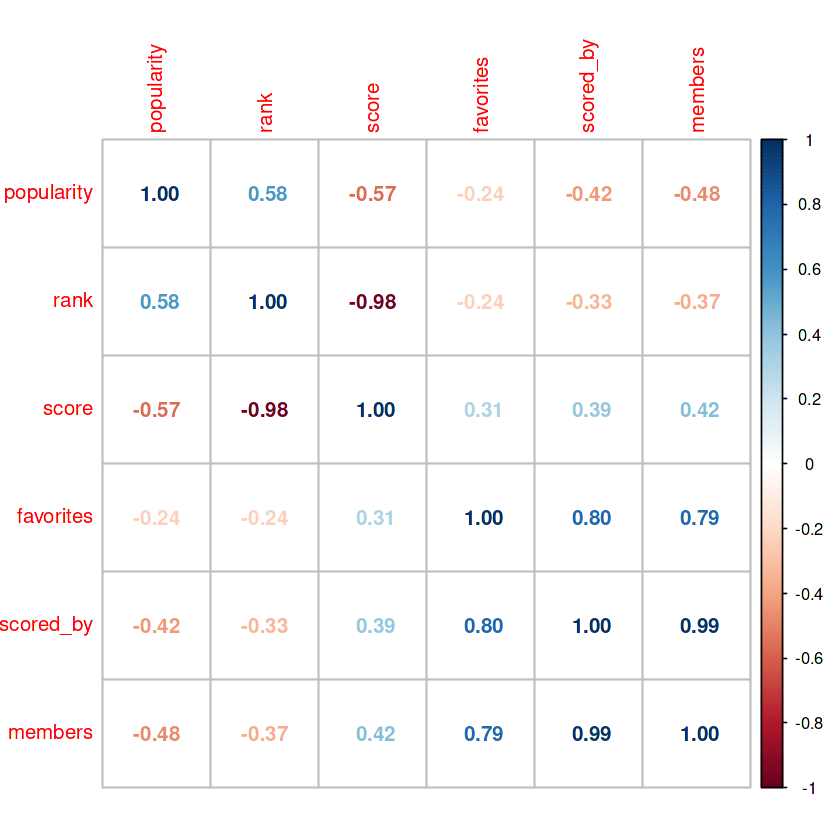

In [ ]:
corr_popularity <- cor(anime_popularity_metrics[, c("popularity", "rank", "score","favorites",
                                                    "scored_by","members")])

corrplot(corr_popularity, method = "number")

**Key points to note when interpreting the correlation matrix:** In terms of anime ranking (popularity and rank), a lower number indicates a higher ranking for the anime. However, in the context of other popularity metrics, the opposite holds true. More users favoriting, scoring, and adding the anime to their lists result in a higher ranking for the anime.

The correlation matrix reveals that *rank* (0.98) demonstrates a stronger relationship with *score* compared to *popularity* (0.57), suggesting that the anime's rank, considering factors beyond popularity, better reflects user ratings. *Popularity* exhibits a moderate relationship with *rank* and *score*, indicating that the popularity rank is moderately influenced by other factors and user ratings.

*Popularity*, *rank*, and *score* show a weak relationship with *favorites*, *scored_by*, and *members*, and vice versa. This suggests that user engagements such as favoriting, scoring, or adding the anime to their list do not significantly impact the anime's ranking and overall score. The significance of *scored_by* and *members* variables is ambiguous, as a higher count in these variables may not necessarily correspond to a higher score or rank. In terms of the *scored_by* variable, more users may have scored the anime, although these ratings could potentially be lower. Regarding *members* variable, it remains unclear why users included the anime in their list, and the correlation might not necessarily imply a positive sentiment. Additionally, it's plausible that users may have favorited the anime without assigning a score to it, contributing to the weak relationship between *favorites*, ranking, and overall score.

In conclusion, it is crucial to consider the anime's ranking, score, and favoriting when evaluating its overall popularity and user engagement.

#### Average Score

In [ ]:
# To get the mean, median and mode of score
mean_score <- mean(anime_data_2023$score, na.rm = TRUE)
print(mean_score)

median_score <- median(anime_data_2023$score, na.rm = TRUE)
print(median_score)

names(sort(-table(anime_data_2023$score)))[1]                # Code to get the mode from w3schools.com

[1] 6.38089
[1] 6.39


[1] "6.31"

Warning message:
“Removed 9213 rows containing non-finite values (`stat_bin()`).”


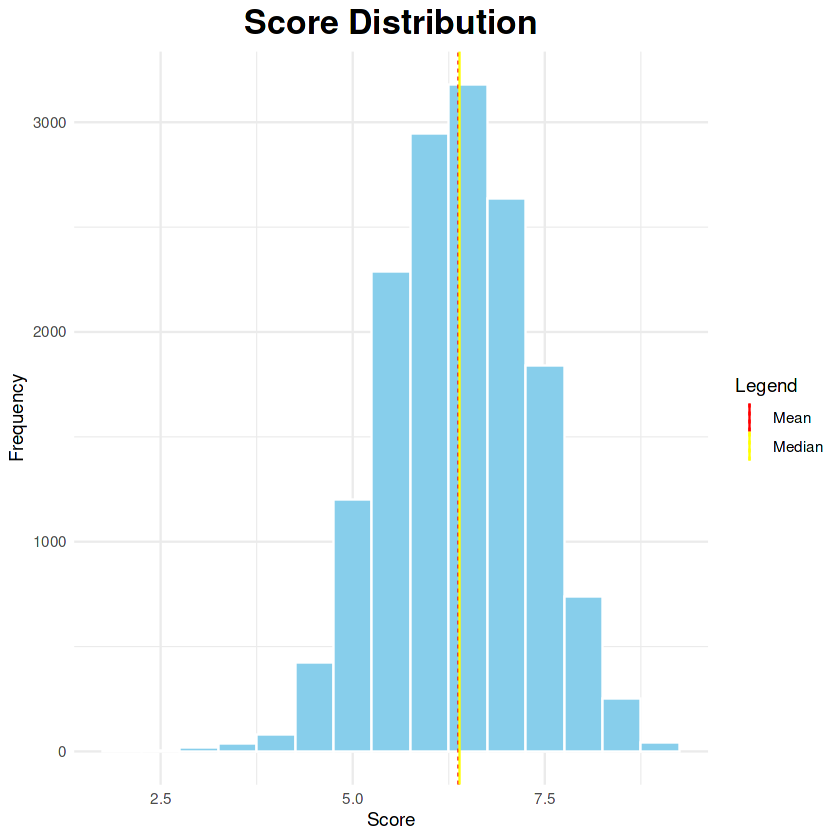

In [ ]:
# Plot
ggplot(anime_data_2023, aes(x = score)) +
    geom_histogram(binwidth = 0.5,  color = "white", fill = "skyblue") +
    labs(title = "Score Distribution", x = "Score", y = "Frequency") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5, size = 20, face = "bold")) +
# Adding mean and median line
    geom_vline(aes(xintercept = mean(score, na.rm = TRUE), color = "Mean"),
               linetype = "dashed", linewidth = 0.5) +
    geom_vline(aes(xintercept = median(score, na.rm = TRUE), color = "Median"),
               linetype = "solid", linewidth = 0.5) +
# Legend for mean and median
    scale_color_manual(name = "Legend",
                       values = c("Mean" = "red", "Median" = "yellow"),
                       labels = c("Mean", "Median"))

#### Top Animes

In [ ]:
# Most Popular Anime
popular_nozero <- anime_data_2023[anime_data_2023$popularity != 0, ]
popular_ranked <- popular_nozero[order(popular_nozero$popularity, na.last = TRUE), ]

popular_anime <- popular_ranked %>%
    select("popularity", "anime_id", "name", "english_name", "genres", "type",
           "episodes", "status", "studios", "source", "duration", "rating", "image_url")

head(popular_anime, n = 10)

,popularity,anime_id,name,english_name,genres,type,episodes,status,studios,source,duration,rating,image_url
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
7429,1,16498,Shingeki no Kyojin,Attack on Titan,"Action, Award Winning, Drama, Suspense",TV,25,Finished Airing,Wit Studio,Manga,24 min per ep,R - 17+ (violence & profanity),https://cdn.myanimelist.net/images/anime/10/47347.jpg
1394,2,1535,Death Note,Death Note,"Supernatural, Suspense",TV,37,Finished Airing,Madhouse,Manga,23 min per ep,R - 17+ (violence & profanity),https://cdn.myanimelist.net/images/anime/9/9453.jpg
3962,3,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy",TV,64,Finished Airing,Bones,Manga,24 min per ep,R - 17+ (violence & profanity),https://cdn.myanimelist.net/images/anime/1208/94745.jpg
10409,4,30276,One Punch Man,One Punch Man,"Action, Comedy",TV,12,Finished Airing,Madhouse,Web manga,24 min per ep,R - 17+ (violence & profanity),https://cdn.myanimelist.net/images/anime/12/76049.jpg
6597,5,11757,Sword Art Online,Sword Art Online,"Action, Adventure, Fantasy, Romance",TV,25,Finished Airing,A-1 Pictures,Light novel,23 min per ep,PG-13 - Teens 13 or older,https://cdn.myanimelist.net/images/anime/11/39717.jpg
11135,6,31964,Boku no Hero Academia,My Hero Academia,Action,TV,13,Finished Airing,Bones,Manga,24 min per ep,PG-13 - Teens 13 or older,https://cdn.myanimelist.net/images/anime/10/78745.jpg
14540,7,38000,Kimetsu no Yaiba,Demon Slayer: Kimetsu no Yaiba,"Action, Award Winning, Fantasy",TV,26,Finished Airing,ufotable,Manga,23 min per ep,R - 17+ (violence & profanity),https://cdn.myanimelist.net/images/anime/1286/99889.jpg
11,8,20,Naruto,Naruto,"Action, Adventure, Fantasy",TV,220,Finished Airing,Pierrot,Manga,23 min per ep,PG-13 - Teens 13 or older,https://cdn.myanimelist.net/images/anime/13/17405.jpg
8620,9,22319,Tokyo Ghoul,Tokyo Ghoul,"Action, Fantasy, Horror",TV,12,Finished Airing,Pierrot,Manga,24 min per ep,R - 17+ (violence & profanity),https://cdn.myanimelist.net/images/anime/1498/134443.jpg


In [ ]:
# Top Ranked Anime
rank_nozero <- anime_data_2023[anime_data_2023$rank != 0, ]
rank_ranked <- rank_nozero[order(rank_nozero$rank, na.last = TRUE), ]

rank_anime <- rank_ranked %>%
    select("rank", "anime_id", "name", "english_name", "genres", "type",
           "episodes", "status", "studios", "source", "duration", "rating", "image_url")

head(rank_anime, n = 10)

,rank,anime_id,name,english_name,genres,type,episodes,status,studios,source,duration,rating,image_url
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
3962,1,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy",TV,64,Finished Airing,Bones,Manga,24 min per ep,R - 17+ (violence & profanity),https://cdn.myanimelist.net/images/anime/1208/94745.jpg
16618,2,41467,Bleach: Sennen Kessen-hen,Bleach: Thousand-Year Blood War,"Action, Adventure, Fantasy",TV,13,Finished Airing,Pierrot,Manga,24 min per ep,R - 17+ (violence & profanity),https://cdn.myanimelist.net/images/anime/1908/135431.jpg
5668,3,9253,Steins;Gate,Steins;Gate,"Drama, Sci-Fi, Suspense",TV,24,Finished Airing,White Fox,Visual novel,24 min per ep,PG-13 - Teens 13 or older,https://cdn.myanimelist.net/images/anime/1935/127974.jpg
9881,4,28977,Gintama°,Gintama Season 4,"Action, Comedy, Sci-Fi",TV,51,Finished Airing,Bandai Namco Pictures,Manga,24 min per ep,PG-13 - Teens 13 or older,https://cdn.myanimelist.net/images/anime/3/72078.jpg
17573,5,43608,Kaguya-sama wa Kokurasetai: Ultra Romantic,Kaguya-sama: Love is War - Ultra Romantic,"Comedy, Romance",TV,13,Finished Airing,A-1 Pictures,Manga,23 min per ep,PG-13 - Teens 13 or older,https://cdn.myanimelist.net/images/anime/1160/122627.jpg
14866,6,38524,Shingeki no Kyojin Season 3 Part 2,Attack on Titan Season 3 Part 2,"Action, Drama",TV,10,Finished Airing,Wit Studio,Manga,23 min per ep,R - 17+ (violence & profanity),https://cdn.myanimelist.net/images/anime/1517/100633.jpg
22349,7,51535,Shingeki no Kyojin: The Final Season - Kanketsu-hen,Attack on Titan: The Final Season - Final Chapters,"Action, Drama, Suspense",Special,2,Currently Airing,MAPPA,Manga,1 hr 1 min per ep,R - 17+ (violence & profanity),https://cdn.myanimelist.net/images/anime/1279/131078.jpg
5990,8,9969,Gintama',Gintama Season 2,"Action, Comedy, Sci-Fi",TV,51,Finished Airing,Sunrise,Manga,24 min per ep,PG-13 - Teens 13 or older,https://cdn.myanimelist.net/images/anime/4/50361.jpg
15526,9,39486,Gintama: The Final,Gintama: The Very Final,"Action, Comedy, Drama, Sci-Fi",Movie,1,Finished Airing,Bandai Namco Pictures,Manga,1 hr 44 min,PG-13 - Teens 13 or older,https://cdn.myanimelist.net/images/anime/1245/116760.jpg


In [ ]:
# Most Favorited Anime
favorites_nozero <- anime_data_2023[anime_data_2023$favorites != 0, ]
favorites_ranked <- favorites_nozero[order(favorites_nozero$favorites,
                                      decreasing = TRUE, na.last = TRUE), ]

favorites_anime <- favorites_ranked %>%
    select("favorites", "anime_id", "name", "english_name", "genres", "type",
           "episodes", "status", "studios", "source", "duration", "rating", "image_url")

head(favorites_anime, n = 10)

,favorites,anime_id,name,english_name,genres,type,episodes,status,studios,source,duration,rating,image_url
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
3962,217606,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy",TV,64,Finished Airing,Bones,Manga,24 min per ep,R - 17+ (violence & profanity),https://cdn.myanimelist.net/images/anime/1208/94745.jpg
6457,200265,11061,Hunter x Hunter (2011),Hunter x Hunter,"Action, Adventure, Fantasy",TV,148,Finished Airing,Madhouse,Manga,23 min per ep,PG-13 - Teens 13 or older,https://cdn.myanimelist.net/images/anime/1337/99013.jpg
12,198986,21,One Piece,One Piece,"Action, Adventure, Fantasy",TV,NA,Currently Airing,Toei Animation,Manga,24 min,PG-13 - Teens 13 or older,https://cdn.myanimelist.net/images/anime/6/73245.jpg
5668,182964,9253,Steins;Gate,Steins;Gate,"Drama, Sci-Fi, Suspense",TV,24,Finished Airing,White Fox,Visual novel,24 min per ep,PG-13 - Teens 13 or older,https://cdn.myanimelist.net/images/anime/1935/127974.jpg
1394,167586,1535,Death Note,Death Note,"Supernatural, Suspense",TV,37,Finished Airing,Madhouse,Manga,23 min per ep,R - 17+ (violence & profanity),https://cdn.myanimelist.net/images/anime/9/9453.jpg
7429,163844,16498,Shingeki no Kyojin,Attack on Titan,"Action, Award Winning, Drama, Suspense",TV,25,Finished Airing,Wit Studio,Manga,24 min per ep,R - 17+ (violence & profanity),https://cdn.myanimelist.net/images/anime/10/47347.jpg
1575,107735,1735,Naruto: Shippuuden,Naruto Shippuden,"Action, Adventure, Fantasy",TV,500,Finished Airing,Pierrot,Manga,23 min per ep,PG-13 - Teens 13 or older,https://cdn.myanimelist.net/images/anime/1565/111305.jpg
1432,105379,1575,Code Geass: Hangyaku no Lelouch,Code Geass: Lelouch of the Rebellion,"Action, Award Winning, Drama, Sci-Fi",TV,25,Finished Airing,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),https://cdn.myanimelist.net/images/anime/1032/135088.jpg
21,100638,30,Neon Genesis Evangelion,Neon Genesis Evangelion,"Action, Avant Garde, Award Winning, Drama, Sci-Fi, Suspense",TV,26,Finished Airing,"Gainax, Tatsunoko Production",Original,24 min per ep,PG-13 - Teens 13 or older,https://cdn.myanimelist.net/images/anime/1314/108941.jpg


In [ ]:
# Top Scored Anime
score_nozero <- anime_data_2023[anime_data_2023$score != 0, ]
score_ranked <- score_nozero[order(score_nozero$score,
                                      decreasing = TRUE, na.last = TRUE), ]

score_anime <- score_ranked %>%
    select("score", "anime_id", "name", "english_name", "genres", "type",
           "episodes", "status", "studios", "source", "duration", "rating", "image_url")

head(score_anime, n = 10)

,score,anime_id,name,english_name,genres,type,episodes,status,studios,source,duration,rating,image_url
,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
3962,9.10,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy",TV,64,Finished Airing,Bones,Manga,24 min per ep,R - 17+ (violence & profanity),https://cdn.myanimelist.net/images/anime/1208/94745.jpg
5668,9.07,9253,Steins;Gate,Steins;Gate,"Drama, Sci-Fi, Suspense",TV,24,Finished Airing,White Fox,Visual novel,24 min per ep,PG-13 - Teens 13 or older,https://cdn.myanimelist.net/images/anime/1935/127974.jpg
16618,9.07,41467,Bleach: Sennen Kessen-hen,Bleach: Thousand-Year Blood War,"Action, Adventure, Fantasy",TV,13,Finished Airing,Pierrot,Manga,24 min per ep,R - 17+ (violence & profanity),https://cdn.myanimelist.net/images/anime/1908/135431.jpg
9881,9.06,28977,Gintama°,Gintama Season 4,"Action, Comedy, Sci-Fi",TV,51,Finished Airing,Bandai Namco Pictures,Manga,24 min per ep,PG-13 - Teens 13 or older,https://cdn.myanimelist.net/images/anime/3/72078.jpg
14866,9.05,38524,Shingeki no Kyojin Season 3 Part 2,Attack on Titan Season 3 Part 2,"Action, Drama",TV,10,Finished Airing,Wit Studio,Manga,23 min per ep,R - 17+ (violence & profanity),https://cdn.myanimelist.net/images/anime/1517/100633.jpg
17573,9.05,43608,Kaguya-sama wa Kokurasetai: Ultra Romantic,Kaguya-sama: Love is War - Ultra Romantic,"Comedy, Romance",TV,13,Finished Airing,A-1 Pictures,Manga,23 min per ep,PG-13 - Teens 13 or older,https://cdn.myanimelist.net/images/anime/1160/122627.jpg
22349,9.05,51535,Shingeki no Kyojin: The Final Season - Kanketsu-hen,Attack on Titan: The Final Season - Final Chapters,"Action, Drama, Suspense",Special,2,Currently Airing,MAPPA,Manga,1 hr 1 min per ep,R - 17+ (violence & profanity),https://cdn.myanimelist.net/images/anime/1279/131078.jpg
5990,9.04,9969,Gintama',Gintama Season 2,"Action, Comedy, Sci-Fi",TV,51,Finished Airing,Sunrise,Manga,24 min per ep,PG-13 - Teens 13 or older,https://cdn.myanimelist.net/images/anime/4/50361.jpg
6457,9.04,11061,Hunter x Hunter (2011),Hunter x Hunter,"Action, Adventure, Fantasy",TV,148,Finished Airing,Madhouse,Manga,23 min per ep,PG-13 - Teens 13 or older,https://cdn.myanimelist.net/images/anime/1337/99013.jpg


#### Genre Analysis

In [ ]:
# To get the average popularity of each genre
action_popularity <- genre_split %>% filter(genre_1 == "Action" |
                                          genre_2 == "Action" |
                                          genre_3 == "Action" |
                                          genre_4 == "Action" |
                                          genre_5 == "Action" |
                                          genre_6 == "Action" |
                                          genre_7 == "Action" |
                                          genre_8 == "Action" |
                                          genre_9 == "Action") %>%
    summarise(action_popularity = mean(popularity, na.rm = TRUE))
print(action_popularity)

adventure_popularity <- genre_split %>% filter(genre_1 == "Adventure" |
                                          genre_2 == "Adventure" |
                                          genre_3 == "Adventure" |
                                          genre_4 == "Adventure" |
                                          genre_5 == "Adventure" |
                                          genre_6 == "Adventure" |
                                          genre_7 == "Adventure" |
                                          genre_8 == "Adventure" |
                                          genre_9 == "Adventure") %>%
    summarise(adventure_popularity = mean(popularity, na.rm = TRUE))
print(adventure_popularity)

sports_popularity <- genre_split %>% filter(genre_1 == "Sports" |
                                          genre_2 == "Sports" |
                                          genre_3 == "Sports" |
                                          genre_4 == "Sports" |
                                          genre_5 == "Sports" |
                                          genre_6 == "Sports" |
                                          genre_7 == "Sports" |
                                          genre_8 == "Sports" |
                                          genre_9 == "Sports") %>%
    summarise(sports_popularity = mean(popularity, na.rm = TRUE))
print(sports_popularity)

comedy_popularity <- genre_split %>% filter(genre_1 == "Comedy" |
                                          genre_2 == "Comedy" |
                                          genre_3 == "Comedy" |
                                          genre_4 == "Comedy" |
                                          genre_5 == "Comedy" |
                                          genre_6 == "Comedy" |
                                          genre_7 == "Comedy" |
                                          genre_8 == "Comedy" |
                                          genre_9 == "Comedy") %>%
    summarise(comedy_popularity = mean(popularity, na.rm = TRUE))
print(comedy_popularity)

drama_popularity <- genre_split %>% filter(genre_1 == "Drama" |
                                          genre_2 == "Drama" |
                                          genre_3 == "Drama" |
                                          genre_4 == "Drama" |
                                          genre_5 == "Drama" |
                                          genre_6 == "Drama" |
                                          genre_7 == "Drama" |
                                          genre_8 == "Drama" |
                                          genre_9 == "Drama") %>%
    summarise(drama_popularity = mean(popularity, na.rm = TRUE))
print(drama_popularity)

avant_garde_popularity <- genre_split %>% filter(genre_1 == "Avant Garde" |
                                          genre_2 == "Avant Garde" |
                                          genre_3 == "Avant Garde" |
                                          genre_4 == "Avant Garde" |
                                          genre_5 == "Avant Garde" |
                                          genre_6 == "Avant Garde" |
                                          genre_7 == "Avant Garde" |
                                          genre_8 == "Avant Garde" |
                                          genre_9 == "Avant Garde") %>%
    summarise(avant_garde_popularity= mean(popularity, na.rm = TRUE))
print(avant_garde_popularity)

award_winning_popularity <- genre_split %>% filter(genre_1 == "Award Winning" |
                                          genre_2 == "Award Winning" |
                                          genre_3 == "Award Winning" |
                                          genre_4 == "Award Winning" |
                                          genre_5 == "Award Winning" |
                                          genre_6 == "Award Winning" |
                                          genre_7 == "Award Winning" |
                                          genre_8 == "Award Winning" |
                                          genre_9 == "Award Winning") %>%
    summarise(award_winning_popularity = mean(popularity, na.rm = TRUE))
print(award_winning_popularity)

sci_fi_popularity <- genre_split %>% filter(genre_1 == "Sci-Fi" |
                                          genre_2 == "Sci-Fi" |
                                          genre_3 == "Sci-Fi" |
                                          genre_4 == "Sci-Fi" |
                                          genre_5 == "Sci-Fi" |
                                          genre_6 == "Sci-Fi" |
                                          genre_7 == "Sci-Fi" |
                                          genre_8 == "Sci-Fi" |
                                          genre_9 == "Sci-Fi") %>%
    summarise(sci_fi_popularity  = mean(popularity, na.rm = TRUE))
print(sci_fi_popularity )

mystery_popularity <- genre_split %>% filter(genre_1 == "Mystery" |
                                          genre_2 == "Mystery" |
                                          genre_3 == "Mystery" |
                                          genre_4 == "Mystery" |
                                          genre_5 == "Mystery" |
                                          genre_6 == "Mystery" |
                                          genre_7 == "Mystery" |
                                          genre_8 == "Mystery" |
                                          genre_9 == "Mystery") %>%
    summarise(mystery_popularity = mean(popularity, na.rm = TRUE))
print(mystery_popularity)

hentai_popularity <- genre_split %>% filter(genre_1 == "Hentai" |
                                          genre_2 == "Hentai" |
                                          genre_3 == "Hentai" |
                                          genre_4 == "Hentai" |
                                          genre_5 == "Hentai" |
                                          genre_6 == "Hentai" |
                                          genre_7 == "Hentai" |
                                          genre_8 == "Hentai" |
                                          genre_9 == "Hentai") %>%
    summarise(hentai_popularity = mean(popularity, na.rm = TRUE))
print(hentai_popularity)

horror_popularity <- genre_split %>% filter(genre_1 == "Horror" |
                                          genre_2 == "Horror" |
                                          genre_3 == "Horror" |
                                          genre_4 == "Horror" |
                                          genre_5 == "Horror" |
                                          genre_6 == "Horror" |
                                          genre_7 == "Horror" |
                                          genre_8 == "Horror" |
                                          genre_9 == "Horror") %>%
    summarise(horror_popularity = mean(popularity, na.rm = TRUE))
print(horror_popularity)

boys_love_popularity <- genre_split %>% filter(genre_1 == "Boys Love" |
                                          genre_2 == "Boys Love" |
                                          genre_3 == "Boys Love" |
                                          genre_4 == "Boys Love" |
                                          genre_5 == "Boys Love" |
                                          genre_6 == "Boys Love" |
                                          genre_7 == "Boys Love" |
                                          genre_8 == "Boys Love" |
                                          genre_9 == "Boys Love") %>%
    summarise(boys_love_popularity = mean(popularity, na.rm = TRUE))
print(boys_love_popularity)

fantasy_popularity <- genre_split %>% filter(genre_1 == "Fantasy" |
                                          genre_2 == "Fantasy" |
                                          genre_3 == "Fantasy" |
                                          genre_4 == "Fantasy" |
                                          genre_5 == "Fantasy" |
                                          genre_6 == "Fantasy" |
                                          genre_7 == "Fantasy" |
                                          genre_8 == "Fantasy" |
                                          genre_9 == "Fantasy") %>%
    summarise(fantasy_popularity = mean(popularity, na.rm = TRUE))
print(fantasy_popularity)

ecchi_popularity <- genre_split %>% filter(genre_1 == "Ecchi" |
                                          genre_2 == "Ecchi" |
                                          genre_3 == "Ecchi" |
                                          genre_4 == "Ecchi" |
                                          genre_5 == "Ecchi" |
                                          genre_6 == "Ecchi" |
                                          genre_7 == "Ecchi" |
                                          genre_8 == "Ecchi" |
                                          genre_9 == "Ecchi") %>%
    summarise(ecchi_popularity = mean(popularity, na.rm = TRUE))
print(ecchi_popularity)

slice_of_life_popularity <- genre_split %>% filter(genre_1 == "Slice of Life" |
                                          genre_2 == "Slice of Life" |
                                          genre_3 == "Slice of Life" |
                                          genre_4 == "Slice of Life" |
                                          genre_5 == "Slice of Life" |
                                          genre_6 == "Slice of Life" |
                                          genre_7 == "Slice of Life" |
                                          genre_8 == "Slice of Life" |
                                          genre_9 == "Slice of Life") %>%
    summarise(slice_of_life_popularity = mean(popularity, na.rm = TRUE))
print(slice_of_life_popularity)

romance_popularity <- genre_split %>% filter(genre_1 == "Romance" |
                                          genre_2 == "Romance" |
                                          genre_3 == "Romance" |
                                          genre_4 == "Romance" |
                                          genre_5 == "Romance" |
                                          genre_6 == "Romance" |
                                          genre_7 == "Romance" |
                                          genre_8 == "Romance" |
                                          genre_9 == "Romance") %>%
    summarise(romance_popularity = mean(popularity, na.rm = TRUE))
print(romance_popularity)

suspense_popularity <- genre_split %>% filter(genre_1 == "Suspense" |
                                          genre_2 == "Suspense" |
                                          genre_3 == "Suspense" |
                                          genre_4 == "Suspense" |
                                          genre_5 == "Suspense" |
                                          genre_6 == "Suspense" |
                                          genre_7 == "Suspense" |
                                          genre_8 == "Suspense" |
                                          genre_9 == "Suspense") %>%
    summarise(suspense_popularity = mean(popularity, na.rm = TRUE))
print(suspense_popularity)

supernatural_popularity <- genre_split %>% filter(genre_1 == "Supernatural" |
                                          genre_2 == "Supernatural" |
                                          genre_3 == "Supernatural" |
                                          genre_4 == "Supernatural" |
                                          genre_5 == "Supernatural" |
                                          genre_6 == "Supernatural" |
                                          genre_7 == "Supernatural" |
                                          genre_8 == "Supernatural" |
                                          genre_9 == "Supernatural") %>%
    summarise(supernatural_popularity = mean(popularity, na.rm = TRUE))
print(supernatural_popularity)

girls_love_popularity <- genre_split %>% filter(genre_1 == "Girls Love" |
                                          genre_2 == "Girls Love" |
                                          genre_3 == "Girls Love" |
                                          genre_4 == "Girls Love" |
                                          genre_5 == "Girls Love" |
                                          genre_6 == "Girls Love" |
                                          genre_7 == "Girls Love" |
                                          genre_8 == "Girls Love" |
                                          genre_9 == "Girls Love") %>%
    summarise(girls_love_popularity = mean(popularity, na.rm = TRUE))
print(girls_love_popularity)

erotica_popularity <- genre_split %>% filter(genre_1 == "Erotica" |
                                          genre_2 == "Erotica" |
                                          genre_3 == "Erotica" |
                                          genre_4 == "Erotica" |
                                          genre_5 == "Erotica" |
                                          genre_6 == "Erotica" |
                                          genre_7 == "Erotica" |
                                          genre_8 == "Erotica" |
                                          genre_9 == "Erotica") %>%
    summarise(erotica_popularity = mean(popularity, na.rm = TRUE))
print(erotica_popularity)

gourmet_popularity <- genre_split %>% filter(genre_1 == "Gourmet" |
                                          genre_2 == "Gourmet" |
                                          genre_3 == "Gourmet" |
                                          genre_4 == "Gourmet" |
                                          genre_5 == "Gourmet" |
                                          genre_6 == "Gourmet" |
                                          genre_7 == "Gourmet" |
                                          genre_8 == "Gourmet" |
                                          genre_9 == "Gourmet") %>%
    summarise(gourmet_popularity = mean(popularity, na.rm = TRUE))
print(gourmet_popularity)

  action_popularity
1          7699.312
  adventure_popularity
1              10670.1
  sports_popularity
1          9690.096
  comedy_popularity
1          10309.19
  drama_popularity
1         8555.042
  avant_garde_popularity
1               16070.02
  award_winning_popularity
1                 6090.544
  sci_fi_popularity
1          9212.922
  mystery_popularity
1           6112.378
  hentai_popularity
1          8318.227
  horror_popularity
1          8337.429
  boys_love_popularity
1             5457.568
  fantasy_popularity
1           11638.49
  ecchi_popularity
1         4727.382
  slice_of_life_popularity
1                 11221.89
  romance_popularity
1           5964.152
  suspense_popularity
1            7024.041
  supernatural_popularity
1                7021.625
  girls_love_popularity
1              5042.858
  erotica_popularity
1           8129.352
  gourmet_popularity
1           9614.514


In [ ]:
# To make a new data frame to combine genre and its average popularity
genre <- c("Action", "Adventure", "Sports", "Comedy", "Drama", "Avant Garde", "Award Winning",
          "Sci-Fi", "Mystery", "Hentai", "Horror", "Boys Love", "Fantasy", "Ecchi",
          "Slice of Life", "Romance", "Suspense", "Supernatural", "Girls Love", "Erotica",
          "Gourmet")

avg_popularity <- c(7699.312, 10670.1, 9690.096, 10309.19, 8555.042, 16070.02, 6090.544,
                        9212.922, 6112.378, 8318.227, 8337.429, 5457.568, 11638.49, 4727.382,
                        11221.89, 5964.152, 7024.041, 7021.625, 5042.858, 8129.352, 9614.514)

genre_popularity <- data.frame(genre, avg_popularity)
genre_popularity[order(genre_popularity$avg_popularity), ]

,genre,avg_popularity
,<chr>,<dbl>
14,Ecchi,4727.382
19,Girls Love,5042.858
12,Boys Love,5457.568
16,Romance,5964.152
7,Award Winning,6090.544
9,Mystery,6112.378
18,Supernatural,7021.625
17,Suspense,7024.041
1,Action,7699.312


In [ ]:
# To get the average rank of each genre
action_rank <- genre_split %>% filter(genre_1 == "Action" |
                                          genre_2 == "Action" |
                                          genre_3 == "Action" |
                                          genre_4 == "Action" |
                                          genre_5 == "Action" |
                                          genre_6 == "Action" |
                                          genre_7 == "Action" |
                                          genre_8 == "Action" |
                                          genre_9 == "Action") %>%
    summarise(action_rank = mean(rank, na.rm = TRUE))
print(action_rank)

adventure_rank <- genre_split %>% filter(genre_1 == "Adventure" |
                                          genre_2 == "Adventure" |
                                          genre_3 == "Adventure" |
                                          genre_4 == "Adventure" |
                                          genre_5 == "Adventure" |
                                          genre_6 == "Adventure" |
                                          genre_7 == "Adventure" |
                                          genre_8 == "Adventure" |
                                          genre_9 == "Adventure") %>%
    summarise(adventure_rank = mean(rank, na.rm = TRUE))
print(adventure_rank)

sports_rank <- genre_split %>% filter(genre_1 == "Sports" |
                                          genre_2 == "Sports" |
                                          genre_3 == "Sports" |
                                          genre_4 == "Sports" |
                                          genre_5 == "Sports" |
                                          genre_6 == "Sports" |
                                          genre_7 == "Sports" |
                                          genre_8 == "Sports" |
                                          genre_9 == "Sports") %>%
    summarise(sports_rank = mean(rank, na.rm = TRUE))
print(sports_rank)

comedy_rank <- genre_split %>% filter(genre_1 == "Comedy" |
                                          genre_2 == "Comedy" |
                                          genre_3 == "Comedy" |
                                          genre_4 == "Comedy" |
                                          genre_5 == "Comedy" |
                                          genre_6 == "Comedy" |
                                          genre_7 == "Comedy" |
                                          genre_8 == "Comedy" |
                                          genre_9 == "Comedy") %>%
    summarise(comedy_rank = mean(rank, na.rm = TRUE))
print(comedy_rank)

drama_rank <- genre_split %>% filter(genre_1 == "Drama" |
                                          genre_2 == "Drama" |
                                          genre_3 == "Drama" |
                                          genre_4 == "Drama" |
                                          genre_5 == "Drama" |
                                          genre_6 == "Drama" |
                                          genre_7 == "Drama" |
                                          genre_8 == "Drama" |
                                          genre_9 == "Drama") %>%
    summarise(drama_rank = mean(rank, na.rm = TRUE))
print(drama_rank)

avant_garde_rank <- genre_split %>% filter(genre_1 == "Avant Garde" |
                                          genre_2 == "Avant Garde" |
                                          genre_3 == "Avant Garde" |
                                          genre_4 == "Avant Garde" |
                                          genre_5 == "Avant Garde" |
                                          genre_6 == "Avant Garde" |
                                          genre_7 == "Avant Garde" |
                                          genre_8 == "Avant Garde" |
                                          genre_9 == "Avant Garde") %>%
    summarise(avant_garde_rank= mean(rank, na.rm = TRUE))
print(avant_garde_rank)

award_winning_rank <- genre_split %>% filter(genre_1 == "Award Winning" |
                                          genre_2 == "Award Winning" |
                                          genre_3 == "Award Winning" |
                                          genre_4 == "Award Winning" |
                                          genre_5 == "Award Winning" |
                                          genre_6 == "Award Winning" |
                                          genre_7 == "Award Winning" |
                                          genre_8 == "Award Winning" |
                                          genre_9 == "Award Winning") %>%
    summarise(award_winning_rank = mean(rank, na.rm = TRUE))
print(award_winning_rank)

sci_fi_rank <- genre_split %>% filter(genre_1 == "Sci-Fi" |
                                          genre_2 == "Sci-Fi" |
                                          genre_3 == "Sci-Fi" |
                                          genre_4 == "Sci-Fi" |
                                          genre_5 == "Sci-Fi" |
                                          genre_6 == "Sci-Fi" |
                                          genre_7 == "Sci-Fi" |
                                          genre_8 == "Sci-Fi" |
                                          genre_9 == "Sci-Fi") %>%
    summarise(sci_fi_rank  = mean(rank, na.rm = TRUE))
print(sci_fi_rank)

mystery_rank<- genre_split %>% filter(genre_1 == "Mystery" |
                                          genre_2 == "Mystery" |
                                          genre_3 == "Mystery" |
                                          genre_4 == "Mystery" |
                                          genre_5 == "Mystery" |
                                          genre_6 == "Mystery" |
                                          genre_7 == "Mystery" |
                                          genre_8 == "Mystery" |
                                          genre_9 == "Mystery") %>%
    summarise(mystery_rank = mean(rank, na.rm = TRUE))
print(mystery_rank)

hentai_rank <- genre_split %>% filter(genre_1 == "Hentai" |
                                          genre_2 == "Hentai" |
                                          genre_3 == "Hentai" |
                                          genre_4 == "Hentai" |
                                          genre_5 == "Hentai" |
                                          genre_6 == "Hentai" |
                                          genre_7 == "Hentai" |
                                          genre_8 == "Hentai" |
                                          genre_9 == "Hentai") %>%
    summarise(hentai_rank = mean(rank, na.rm = TRUE))
print(hentai_rank)

horror_rank <- genre_split %>% filter(genre_1 == "Horror" |
                                          genre_2 == "Horror" |
                                          genre_3 == "Horror" |
                                          genre_4 == "Horror" |
                                          genre_5 == "Horror" |
                                          genre_6 == "Horror" |
                                          genre_7 == "Horror" |
                                          genre_8 == "Horror" |
                                          genre_9 == "Horror") %>%
    summarise(horror_rank = mean(rank, na.rm = TRUE))
print(horror_rank)

boys_love_rank <- genre_split %>% filter(genre_1 == "Boys Love" |
                                          genre_2 == "Boys Love" |
                                          genre_3 == "Boys Love" |
                                          genre_4 == "Boys Love" |
                                          genre_5 == "Boys Love" |
                                          genre_6 == "Boys Love" |
                                          genre_7 == "Boys Love" |
                                          genre_8 == "Boys Love" |
                                          genre_9 == "Boys Love") %>%
    summarise(boys_love_rank = mean(rank, na.rm = TRUE))
print(boys_love_rank)

fantasy_rank <- genre_split %>% filter(genre_1 == "Fantasy" |
                                          genre_2 == "Fantasy" |
                                          genre_3 == "Fantasy" |
                                          genre_4 == "Fantasy" |
                                          genre_5 == "Fantasy" |
                                          genre_6 == "Fantasy" |
                                          genre_7 == "Fantasy" |
                                          genre_8 == "Fantasy" |
                                          genre_9 == "Fantasy") %>%
    summarise(fantasy_rank = mean(rank, na.rm = TRUE))
print(fantasy_rank)

ecchi_rank <- genre_split %>% filter(genre_1 == "Ecchi" |
                                          genre_2 == "Ecchi" |
                                          genre_3 == "Ecchi" |
                                          genre_4 == "Ecchi" |
                                          genre_5 == "Ecchi" |
                                          genre_6 == "Ecchi" |
                                          genre_7 == "Ecchi" |
                                          genre_8 == "Ecchi" |
                                          genre_9 == "Ecchi") %>%
    summarise(ecchi_rank = mean(rank, na.rm = TRUE))
print(ecchi_rank)

slice_of_life_rank <- genre_split %>% filter(genre_1 == "Slice of Life" |
                                          genre_2 == "Slice of Life" |
                                          genre_3 == "Slice of Life" |
                                          genre_4 == "Slice of Life" |
                                          genre_5 == "Slice of Life" |
                                          genre_6 == "Slice of Life" |
                                          genre_7 == "Slice of Life" |
                                          genre_8 == "Slice of Life" |
                                          genre_9 == "Slice of Life") %>%
    summarise(slice_of_life_rank = mean(rank, na.rm = TRUE))
print(slice_of_life_rank)

romance_rank <- genre_split %>% filter(genre_1 == "Romance" |
                                          genre_2 == "Romance" |
                                          genre_3 == "Romance" |
                                          genre_4 == "Romance" |
                                          genre_5 == "Romance" |
                                          genre_6 == "Romance" |
                                          genre_7 == "Romance" |
                                          genre_8 == "Romance" |
                                          genre_9 == "Romance") %>%
    summarise(romance_rank= mean(rank, na.rm = TRUE))
print(romance_rank)

suspense_rank <- genre_split %>% filter(genre_1 == "Suspense" |
                                          genre_2 == "Suspense" |
                                          genre_3 == "Suspense" |
                                          genre_4 == "Suspense" |
                                          genre_5 == "Suspense" |
                                          genre_6 == "Suspense" |
                                          genre_7 == "Suspense" |
                                          genre_8 == "Suspense" |
                                          genre_9 == "Suspense") %>%
    summarise(suspense_rank= mean(rank, na.rm = TRUE))
print(suspense_rank)

supernatural_rank <- genre_split %>% filter(genre_1 == "Supernatural" |
                                          genre_2 == "Supernatural" |
                                          genre_3 == "Supernatural" |
                                          genre_4 == "Supernatural" |
                                          genre_5 == "Supernatural" |
                                          genre_6 == "Supernatural" |
                                          genre_7 == "Supernatural" |
                                          genre_8 == "Supernatural" |
                                          genre_9 == "Supernatural") %>%
    summarise(supernatural_rank = mean(rank, na.rm = TRUE))
print(supernatural_rank)

girls_love_rank <- genre_split %>% filter(genre_1 == "Girls Love" |
                                          genre_2 == "Girls Love" |
                                          genre_3 == "Girls Love" |
                                          genre_4 == "Girls Love" |
                                          genre_5 == "Girls Love" |
                                          genre_6 == "Girls Love" |
                                          genre_7 == "Girls Love" |
                                          genre_8 == "Girls Love" |
                                          genre_9 == "Girls Love") %>%
    summarise(girls_love_rank = mean(rank, na.rm = TRUE))
print(girls_love_rank)

erotica_rank <- genre_split %>% filter(genre_1 == "Erotica" |
                                          genre_2 == "Erotica" |
                                          genre_3 == "Erotica" |
                                          genre_4 == "Erotica" |
                                          genre_5 == "Erotica" |
                                          genre_6 == "Erotica" |
                                          genre_7 == "Erotica" |
                                          genre_8 == "Erotica" |
                                          genre_9 == "Erotica") %>%
    summarise(erotica_rank = mean(rank, na.rm = TRUE))
print(erotica_rank)

gourmet_rank <- genre_split %>% filter(genre_1 == "Gourmet" |
                                          genre_2 == "Gourmet" |
                                          genre_3 == "Gourmet" |
                                          genre_4 == "Gourmet" |
                                          genre_5 == "Gourmet" |
                                          genre_6 == "Gourmet" |
                                          genre_7 == "Gourmet" |
                                          genre_8 == "Gourmet" |
                                          genre_9 == "Gourmet") %>%
    summarise(gourmet_rank = mean(rank, na.rm = TRUE))
print(gourmet_rank)

  action_rank
1     6804.83
  adventure_rank
1       8616.563
  sports_rank
1     8015.65
  comedy_rank
1    8952.011
  drama_rank
1   7203.806
  avant_garde_rank
1         12768.65
  award_winning_rank
1           4767.971
  sci_fi_rank
1    7824.349
  mystery_rank
1     5311.503
  hentai_rank
1           0
  horror_rank
1    8310.901
  boys_love_rank
1       5915.357
  fantasy_rank
1     9566.118
  ecchi_rank
1   6678.866
  slice_of_life_rank
1           9500.772
  romance_rank
1     5458.292
  suspense_rank
1       6410.14
  supernatural_rank
1           6411.69
  girls_love_rank
1        5603.714
  erotica_rank
1          NaN
  gourmet_rank
1     8062.081


In [ ]:
# To make a new data frame to combine genre and its average rank
genre <- c("Action", "Adventure", "Sports", "Comedy", "Drama", "Avant Garde", "Award Winning",
          "Sci-Fi", "Mystery", "Hentai", "Horror", "Boys Love", "Fantasy", "Ecchi",
          "Slice of Life", "Romance", "Suspense", "Supernatural", "Girls Love", "Erotica",
          "Gourmet")

avg_rank <- c(6804.83, 8616.563, 8015.65, 8952.011, 7203.806, 12768.65, 4767.971,
                 7824.349, 5311.503, NA, 8310.901, 5915.357, 9566.118, 6678.866, 9500.772,
                 5458.292, 6410.14, 6411.69, 5603.714, NA, 8062.081)

genre_rank <- data.frame(genre, avg_rank)
genre_rank[order(genre_rank$avg_rank), ]

,genre,avg_rank
,<chr>,<dbl>
7,Award Winning,4767.971
9,Mystery,5311.503
16,Romance,5458.292
19,Girls Love,5603.714
12,Boys Love,5915.357
17,Suspense,6410.140
18,Supernatural,6411.690
14,Ecchi,6678.866
1,Action,6804.830


In [ ]:
# To get the most favorited of each genre
action_favorites <- genre_split %>% filter(genre_1 == "Action" |
                                          genre_2 == "Action" |
                                          genre_3 == "Action" |
                                          genre_4 == "Action" |
                                          genre_5 == "Action" |
                                          genre_6 == "Action" |
                                          genre_7 == "Action" |
                                          genre_8 == "Action" |
                                          genre_9 == "Action") %>%
    summarise(action_favorites = mean(favorites, na.rm = TRUE))
print(action_favorites)

adventure_favorites <- genre_split %>% filter(genre_1 == "Adventure" |
                                          genre_2 == "Adventure" |
                                          genre_3 == "Adventure" |
                                          genre_4 == "Adventure" |
                                          genre_5 == "Adventure" |
                                          genre_6 == "Adventure" |
                                          genre_7 == "Adventure" |
                                          genre_8 == "Adventure" |
                                          genre_9 == "Adventure") %>%
    summarise(adventure_favorites = mean(favorites, na.rm = TRUE))
print(adventure_favorites)

sports_favorites <- genre_split %>% filter(genre_1 == "Sports" |
                                          genre_2 == "Sports" |
                                          genre_3 == "Sports" |
                                          genre_4 == "Sports" |
                                          genre_5 == "Sports" |
                                          genre_6 == "Sports" |
                                          genre_7 == "Sports" |
                                          genre_8 == "Sports" |
                                          genre_9 == "Sports") %>%
    summarise(sports_favorites = mean(favorites, na.rm = TRUE))
print(sports_favorites)

comedy_favorites <- genre_split %>% filter(genre_1 == "Comedy" |
                                          genre_2 == "Comedy" |
                                          genre_3 == "Comedy" |
                                          genre_4 == "Comedy" |
                                          genre_5 == "Comedy" |
                                          genre_6 == "Comedy" |
                                          genre_7 == "Comedy" |
                                          genre_8 == "Comedy" |
                                          genre_9 == "Comedy") %>%
    summarise(comedy_favorites = mean(favorites, na.rm = TRUE))
print(comedy_favorites)

drama_favorites <- genre_split %>% filter(genre_1 == "Drama" |
                                          genre_2 == "Drama" |
                                          genre_3 == "Drama" |
                                          genre_4 == "Drama" |
                                          genre_5 == "Drama" |
                                          genre_6 == "Drama" |
                                          genre_7 == "Drama" |
                                          genre_8 == "Drama" |
                                          genre_9 == "Drama") %>%
    summarise(drama_favorites = mean(favorites, na.rm = TRUE))
print(drama_favorites)

avant_garde_favorites <- genre_split %>% filter(genre_1 == "Avant Garde" |
                                          genre_2 == "Avant Garde" |
                                          genre_3 == "Avant Garde" |
                                          genre_4 == "Avant Garde" |
                                          genre_5 == "Avant Garde" |
                                          genre_6 == "Avant Garde" |
                                          genre_7 == "Avant Garde" |
                                          genre_8 == "Avant Garde" |
                                          genre_9 == "Avant Garde") %>%
    summarise(avant_garde_favorites= mean(favorites, na.rm = TRUE))
print(avant_garde_favorites)

award_winning_favorites <- genre_split %>% filter(genre_1 == "Award Winning" |
                                          genre_2 == "Award Winning" |
                                          genre_3 == "Award Winning" |
                                          genre_4 == "Award Winning" |
                                          genre_5 == "Award Winning" |
                                          genre_6 == "Award Winning" |
                                          genre_7 == "Award Winning" |
                                          genre_8 == "Award Winning" |
                                          genre_9 == "Award Winning") %>%
    summarise(award_winning_favorites = mean(favorites, na.rm = TRUE))
print(award_winning_favorites)

sci_fi_favorites <- genre_split %>% filter(genre_1 == "Sci-Fi" |
                                          genre_2 == "Sci-Fi" |
                                          genre_3 == "Sci-Fi" |
                                          genre_4 == "Sci-Fi" |
                                          genre_5 == "Sci-Fi" |
                                          genre_6 == "Sci-Fi" |
                                          genre_7 == "Sci-Fi" |
                                          genre_8 == "Sci-Fi" |
                                          genre_9 == "Sci-Fi") %>%
    summarise(sci_fi_favorites  = mean(favorites, na.rm = TRUE))
print(sci_fi_favorites)

mystery_favorites <- genre_split %>% filter(genre_1 == "Mystery" |
                                          genre_2 == "Mystery" |
                                          genre_3 == "Mystery" |
                                          genre_4 == "Mystery" |
                                          genre_5 == "Mystery" |
                                          genre_6 == "Mystery" |
                                          genre_7 == "Mystery" |
                                          genre_8 == "Mystery" |
                                          genre_9 == "Mystery") %>%
    summarise(mystery_favorites = mean(favorites, na.rm = TRUE))
print(mystery_favorites)

hentai_favorites <- genre_split %>% filter(genre_1 == "Hentai" |
                                          genre_2 == "Hentai" |
                                          genre_3 == "Hentai" |
                                          genre_4 == "Hentai" |
                                          genre_5 == "Hentai" |
                                          genre_6 == "Hentai" |
                                          genre_7 == "Hentai" |
                                          genre_8 == "Hentai" |
                                          genre_9 == "Hentai") %>%
    summarise(hentai_favorites = mean(favorites, na.rm = TRUE))
print(hentai_favorites)

horror_favorites <- genre_split %>% filter(genre_1 == "Horror" |
                                          genre_2 == "Horror" |
                                          genre_3 == "Horror" |
                                          genre_4 == "Horror" |
                                          genre_5 == "Horror" |
                                          genre_6 == "Horror" |
                                          genre_7 == "Horror" |
                                          genre_8 == "Horror" |
                                          genre_9 == "Horror") %>%
    summarise(horror_favorites = mean(favorites, na.rm = TRUE))
print(horror_favorites)

boys_love_favorites <- genre_split %>% filter(genre_1 == "Boys Love" |
                                          genre_2 == "Boys Love" |
                                          genre_3 == "Boys Love" |
                                          genre_4 == "Boys Love" |
                                          genre_5 == "Boys Love" |
                                          genre_6 == "Boys Love" |
                                          genre_7 == "Boys Love" |
                                          genre_8 == "Boys Love" |
                                          genre_9 == "Boys Love") %>%
    summarise(boys_love_favorites = mean(favorites, na.rm = TRUE))
print(boys_love_favorites)

fantasy_favorites <- genre_split %>% filter(genre_1 == "Fantasy" |
                                          genre_2 == "Fantasy" |
                                          genre_3 == "Fantasy" |
                                          genre_4 == "Fantasy" |
                                          genre_5 == "Fantasy" |
                                          genre_6 == "Fantasy" |
                                          genre_7 == "Fantasy" |
                                          genre_8 == "Fantasy" |
                                          genre_9 == "Fantasy") %>%
    summarise(fantasy_favorites= mean(favorites, na.rm = TRUE))
print(fantasy_favorites)

ecchi_favorites <- genre_split %>% filter(genre_1 == "Ecchi" |
                                          genre_2 == "Ecchi" |
                                          genre_3 == "Ecchi" |
                                          genre_4 == "Ecchi" |
                                          genre_5 == "Ecchi" |
                                          genre_6 == "Ecchi" |
                                          genre_7 == "Ecchi" |
                                          genre_8 == "Ecchi" |
                                          genre_9 == "Ecchi") %>%
    summarise(ecchi_favorites = mean(favorites, na.rm = TRUE))
print(ecchi_favorites)

slice_of_life_favorites <- genre_split %>% filter(genre_1 == "Slice of Life" |
                                          genre_2 == "Slice of Life" |
                                          genre_3 == "Slice of Life" |
                                          genre_4 == "Slice of Life" |
                                          genre_5 == "Slice of Life" |
                                          genre_6 == "Slice of Life" |
                                          genre_7 == "Slice of Life" |
                                          genre_8 == "Slice of Life" |
                                          genre_9 == "Slice of Life") %>%
    summarise(slice_of_life_favorites = mean(favorites, na.rm = TRUE))
print(slice_of_life_favorites)

romance_favorites <- genre_split %>% filter(genre_1 == "Romance" |
                                          genre_2 == "Romance" |
                                          genre_3 == "Romance" |
                                          genre_4 == "Romance" |
                                          genre_5 == "Romance" |
                                          genre_6 == "Romance" |
                                          genre_7 == "Romance" |
                                          genre_8 == "Romance" |
                                          genre_9 == "Romance") %>%
    summarise(romance_favorites= mean(favorites, na.rm = TRUE))
print(romance_favorites)

suspense_favorites <- genre_split %>% filter(genre_1 == "Suspense" |
                                          genre_2 == "Suspense" |
                                          genre_3 == "Suspense" |
                                          genre_4 == "Suspense" |
                                          genre_5 == "Suspense" |
                                          genre_6 == "Suspense" |
                                          genre_7 == "Suspense" |
                                          genre_8 == "Suspense" |
                                          genre_9 == "Suspense") %>%
    summarise(suspense_favorites = mean(favorites, na.rm = TRUE))
print(suspense_favorites)

supernatural_favorites <- genre_split %>% filter(genre_1 == "Supernatural" |
                                          genre_2 == "Supernatural" |
                                          genre_3 == "Supernatural" |
                                          genre_4 == "Supernatural" |
                                          genre_5 == "Supernatural" |
                                          genre_6 == "Supernatural" |
                                          genre_7 == "Supernatural" |
                                          genre_8 == "Supernatural" |
                                          genre_9 == "Supernatural") %>%
    summarise(supernatural_favorites = mean(favorites, na.rm = TRUE))
print(supernatural_favorites)

girls_love_favorites <- genre_split %>% filter(genre_1 == "Girls Love" |
                                          genre_2 == "Girls Love" |
                                          genre_3 == "Girls Love" |
                                          genre_4 == "Girls Love" |
                                          genre_5 == "Girls Love" |
                                          genre_6 == "Girls Love" |
                                          genre_7 == "Girls Love" |
                                          genre_8 == "Girls Love" |
                                          genre_9 == "Girls Love") %>%
    summarise(girls_love_favorites = mean(favorites, na.rm = TRUE))
print(girls_love_favorites)

erotica_favorites <- genre_split %>% filter(genre_1 == "Erotica" |
                                          genre_2 == "Erotica" |
                                          genre_3 == "Erotica" |
                                          genre_4 == "Erotica" |
                                          genre_5 == "Erotica" |
                                          genre_6 == "Erotica" |
                                          genre_7 == "Erotica" |
                                          genre_8 == "Erotica" |
                                          genre_9 == "Erotica") %>%
    summarise(erotica_favorites = mean(favorites, na.rm = TRUE))
print(erotica_favorites)

gourmet_favorites <- genre_split %>% filter(genre_1 == "Gourmet" |
                                          genre_2 == "Gourmet" |
                                          genre_3 == "Gourmet" |
                                          genre_4 == "Gourmet" |
                                          genre_5 == "Gourmet" |
                                          genre_6 == "Gourmet" |
                                          genre_7 == "Gourmet" |
                                          genre_8 == "Gourmet" |
                                          genre_9 == "Gourmet") %>%
    summarise(gourmet_favorites = mean(favorites, na.rm = TRUE))
print(gourmet_favorites)

  action_favorites
1          1145.92
  adventure_favorites
1            713.9995
  sports_favorites
1          457.192
  comedy_favorites
1         369.6686
  drama_favorites
1         1336.11
  avant_garde_favorites
1              314.2848
  award_winning_favorites
1                6284.452
  sci_fi_favorites
1         588.5357
  mystery_favorites
1          1346.922
  hentai_favorites
1         36.09825
  horror_favorites
1         827.1236
  boys_love_favorites
1            389.8284
  fantasy_favorites
1          684.9597
  ecchi_favorites
1        566.1321
  slice_of_life_favorites
1                197.2063
  romance_favorites
1          1050.925
  suspense_favorites
1           5371.942
  supernatural_favorites
1               1352.015
  girls_love_favorites
1             377.4602
  erotica_favorites
1           232.537
  gourmet_favorites
1          345.6164


In [ ]:
# To make a new data frame to combine genre and its average number of favorites
genre <- c("Action", "Adventure", "Sports", "Comedy", "Drama", "Avant Garde", "Award Winning",
          "Sci-Fi", "Mystery", "Hentai", "Horror", "Boys Love", "Fantasy", "Ecchi",
          "Slice of Life", "Romance", "Suspense", "Supernatural", "Girls Love", "Erotica",
          "Gourmet")

avg_favorites <- c(1145.92, 713.9995, 457.192, 369.6686, 1336.11, 314.2848, 6284.452,
                      588.5357, 1346.922, 36.09825, 827.1236, 389.8284, 684.9597, 566.1321,
                      197.2063, 1050.925, 5371.942, 1352.015, 377.4602, 232.537, 345.6164)

genre_favorites <- data.frame(genre, avg_favorites)
genre_favorites[order(genre_favorites$avg_favorites, decreasing = TRUE), ]

,genre,avg_favorites
,<chr>,<dbl>
7,Award Winning,6284.45200
17,Suspense,5371.94200
18,Supernatural,1352.01500
9,Mystery,1346.92200
5,Drama,1336.11000
1,Action,1145.92000
16,Romance,1050.92500
11,Horror,827.12360
2,Adventure,713.99950


In [ ]:
# To get the top scored of each genre
action_score <- genre_split %>% filter(genre_1 == "Action" |
                                          genre_2 == "Action" |
                                          genre_3 == "Action" |
                                          genre_4 == "Action" |
                                          genre_5 == "Action" |
                                          genre_6 == "Action" |
                                          genre_7 == "Action" |
                                          genre_8 == "Action" |
                                          genre_9 == "Action") %>%
    summarise(action_score = mean(score, na.rm = TRUE))
print(action_score)

adventure_score <- genre_split %>% filter(genre_1 == "Adventure" |
                                          genre_2 == "Adventure" |
                                          genre_3 == "Adventure" |
                                          genre_4 == "Adventure" |
                                          genre_5 == "Adventure" |
                                          genre_6 == "Adventure" |
                                          genre_7 == "Adventure" |
                                          genre_8 == "Adventure" |
                                          genre_9 == "Adventure") %>%
    summarise(adventure_score = mean(score, na.rm = TRUE))
print(adventure_score)

sports_score <- genre_split %>% filter(genre_1 == "Sports" |
                                          genre_2 == "Sports" |
                                          genre_3 == "Sports" |
                                          genre_4 == "Sports" |
                                          genre_5 == "Sports" |
                                          genre_6 == "Sports" |
                                          genre_7 == "Sports" |
                                          genre_8 == "Sports" |
                                          genre_9 == "Sports") %>%
    summarise(sports_score = mean(score, na.rm = TRUE))
print(sports_score)

comedy_score <- genre_split %>% filter(genre_1 == "Comedy" |
                                          genre_2 == "Comedy" |
                                          genre_3 == "Comedy" |
                                          genre_4 == "Comedy" |
                                          genre_5 == "Comedy" |
                                          genre_6 == "Comedy" |
                                          genre_7 == "Comedy" |
                                          genre_8 == "Comedy" |
                                          genre_9 == "Comedy") %>%
    summarise(comedy_score = mean(score, na.rm = TRUE))
print(comedy_score)

drama_score <- genre_split %>% filter(genre_1 == "Drama" |
                                          genre_2 == "Drama" |
                                          genre_3 == "Drama" |
                                          genre_4 == "Drama" |
                                          genre_5 == "Drama" |
                                          genre_6 == "Drama" |
                                          genre_7 == "Drama" |
                                          genre_8 == "Drama" |
                                          genre_9 == "Drama") %>%
    summarise(drama_score = mean(score, na.rm = TRUE))
print(drama_score)

avant_garde_score <- genre_split %>% filter(genre_1 == "Avant Garde" |
                                          genre_2 == "Avant Garde" |
                                          genre_3 == "Avant Garde" |
                                          genre_4 == "Avant Garde" |
                                          genre_5 == "Avant Garde" |
                                          genre_6 == "Avant Garde" |
                                          genre_7 == "Avant Garde" |
                                          genre_8 == "Avant Garde" |
                                          genre_9 == "Avant Garde") %>%
    summarise(avant_garde_score= mean(score, na.rm = TRUE))
print(avant_garde_score)

award_winning_score <- genre_split %>% filter(genre_1 == "Award Winning" |
                                          genre_2 == "Award Winning" |
                                          genre_3 == "Award Winning" |
                                          genre_4 == "Award Winning" |
                                          genre_5 == "Award Winning" |
                                          genre_6 == "Award Winning" |
                                          genre_7 == "Award Winning" |
                                          genre_8 == "Award Winning" |
                                          genre_9 == "Award Winning") %>%
    summarise(award_winning_score = mean(score, na.rm = TRUE))
print(award_winning_score)

sci_fi_score <- genre_split %>% filter(genre_1 == "Sci-Fi" |
                                          genre_2 == "Sci-Fi" |
                                          genre_3 == "Sci-Fi" |
                                          genre_4 == "Sci-Fi" |
                                          genre_5 == "Sci-Fi" |
                                          genre_6 == "Sci-Fi" |
                                          genre_7 == "Sci-Fi" |
                                          genre_8 == "Sci-Fi" |
                                          genre_9 == "Sci-Fi") %>%
    summarise(sci_fi_score  = mean(score, na.rm = TRUE))
print(sci_fi_score)

mystery_score <- genre_split %>% filter(genre_1 == "Mystery" |
                                          genre_2 == "Mystery" |
                                          genre_3 == "Mystery" |
                                          genre_4 == "Mystery" |
                                          genre_5 == "Mystery" |
                                          genre_6 == "Mystery" |
                                          genre_7 == "Mystery" |
                                          genre_8 == "Mystery" |
                                          genre_9 == "Mystery") %>%
    summarise(mystery_score = mean(score, na.rm = TRUE))
print(mystery_score)

hentai_score <- genre_split %>% filter(genre_1 == "Hentai" |
                                          genre_2 == "Hentai" |
                                          genre_3 == "Hentai" |
                                          genre_4 == "Hentai" |
                                          genre_5 == "Hentai" |
                                          genre_6 == "Hentai" |
                                          genre_7 == "Hentai" |
                                          genre_8 == "Hentai" |
                                          genre_9 == "Hentai") %>%
    summarise(hentai_score = mean(score, na.rm = TRUE))
print(hentai_score)

horror_score <- genre_split %>% filter(genre_1 == "Horror" |
                                          genre_2 == "Horror" |
                                          genre_3 == "Horror" |
                                          genre_4 == "Horror" |
                                          genre_5 == "Horror" |
                                          genre_6 == "Horror" |
                                          genre_7 == "Horror" |
                                          genre_8 == "Horror" |
                                          genre_9 == "Horror") %>%
    summarise(horror_score = mean(score, na.rm = TRUE))
print(horror_score)

boys_love_score <- genre_split %>% filter(genre_1 == "Boys Love" |
                                          genre_2 == "Boys Love" |
                                          genre_3 == "Boys Love" |
                                          genre_4 == "Boys Love" |
                                          genre_5 == "Boys Love" |
                                          genre_6 == "Boys Love" |
                                          genre_7 == "Boys Love" |
                                          genre_8 == "Boys Love" |
                                          genre_9 == "Boys Love") %>%
    summarise(boys_love_score = mean(score, na.rm = TRUE))
print(boys_love_score)

fantasy_score <- genre_split %>% filter(genre_1 == "Fantasy" |
                                          genre_2 == "Fantasy" |
                                          genre_3 == "Fantasy" |
                                          genre_4 == "Fantasy" |
                                          genre_5 == "Fantasy" |
                                          genre_6 == "Fantasy" |
                                          genre_7 == "Fantasy" |
                                          genre_8 == "Fantasy" |
                                          genre_9 == "Fantasy") %>%
    summarise(fantasy_score = mean(score, na.rm = TRUE))
print(fantasy_score)

ecchi_score <- genre_split %>% filter(genre_1 == "Ecchi" |
                                          genre_2 == "Ecchi" |
                                          genre_3 == "Ecchi" |
                                          genre_4 == "Ecchi" |
                                          genre_5 == "Ecchi" |
                                          genre_6 == "Ecchi" |
                                          genre_7 == "Ecchi" |
                                          genre_8 == "Ecchi" |
                                          genre_9 == "Ecchi") %>%
    summarise(ecchi_score = mean(score, na.rm = TRUE))
print(ecchi_score)

slice_of_life_score <- genre_split %>% filter(genre_1 == "Slice of Life" |
                                          genre_2 == "Slice of Life" |
                                          genre_3 == "Slice of Life" |
                                          genre_4 == "Slice of Life" |
                                          genre_5 == "Slice of Life" |
                                          genre_6 == "Slice of Life" |
                                          genre_7 == "Slice of Life" |
                                          genre_8 == "Slice of Life" |
                                          genre_9 == "Slice of Life") %>%
    summarise(slice_of_life_score = mean(score, na.rm = TRUE))
print(slice_of_life_score)

romance_score <- genre_split %>% filter(genre_1 == "Romance" |
                                          genre_2 == "Romance" |
                                          genre_3 == "Romance" |
                                          genre_4 == "Romance" |
                                          genre_5 == "Romance" |
                                          genre_6 == "Romance" |
                                          genre_7 == "Romance" |
                                          genre_8 == "Romance" |
                                          genre_9 == "Romance") %>%
    summarise(romance_score= mean(score, na.rm = TRUE))
print(romance_score)

suspense_score <- genre_split %>% filter(genre_1 == "Suspense" |
                                          genre_2 == "Suspense" |
                                          genre_3 == "Suspense" |
                                          genre_4 == "Suspense" |
                                          genre_5 == "Suspense" |
                                          genre_6 == "Suspense" |
                                          genre_7 == "Suspense" |
                                          genre_8 == "Suspense" |
                                          genre_9 == "Suspense") %>%
    summarise(suspense_score = mean(score, na.rm = TRUE))
print(suspense_score)

supernatural_score <- genre_split %>% filter(genre_1 == "Supernatural" |
                                          genre_2 == "Supernatural" |
                                          genre_3 == "Supernatural" |
                                          genre_4 == "Supernatural" |
                                          genre_5 == "Supernatural" |
                                          genre_6 == "Supernatural" |
                                          genre_7 == "Supernatural" |
                                          genre_8 == "Supernatural" |
                                          genre_9 == "Supernatural") %>%
    summarise(supernatural_score = mean(score, na.rm = TRUE))
print(supernatural_score)

girls_love_score <- genre_split %>% filter(genre_1 == "Girls Love" |
                                          genre_2 == "Girls Love" |
                                          genre_3 == "Girls Love" |
                                          genre_4 == "Girls Love" |
                                          genre_5 == "Girls Love" |
                                          genre_6 == "Girls Love" |
                                          genre_7 == "Girls Love" |
                                          genre_8 == "Girls Love" |
                                          genre_9 == "Girls Love") %>%
    summarise(girls_love_score = mean(score, na.rm = TRUE))
print(girls_love_score)

erotica_score <- genre_split %>% filter(genre_1 == "Erotica" |
                                          genre_2 == "Erotica" |
                                          genre_3 == "Erotica" |
                                          genre_4 == "Erotica" |
                                          genre_5 == "Erotica" |
                                          genre_6 == "Erotica" |
                                          genre_7 == "Erotica" |
                                          genre_8 == "Erotica" |
                                          genre_9 == "Erotica") %>%
    summarise(erotica_score = mean(score, na.rm = TRUE))
print(erotica_score)

gourmet_score <- genre_split %>% filter(genre_1 == "Gourmet" |
                                          genre_2 == "Gourmet" |
                                          genre_3 == "Gourmet" |
                                          genre_4 == "Gourmet" |
                                          genre_5 == "Gourmet" |
                                          genre_6 == "Gourmet" |
                                          genre_7 == "Gourmet" |
                                          genre_8 == "Gourmet" |
                                          genre_9 == "Gourmet") %>%
    summarise(gourmet_score = mean(score, na.rm = TRUE))
print(gourmet_score)

  action_score
1     6.674112
  adventure_score
1        6.673997
  sports_score
1     6.722046
  comedy_score
1     6.522961
  drama_score
1    6.850645
  avant_garde_score
1          5.143932
  award_winning_score
1            7.296308
  sci_fi_score
1     6.563554
  mystery_score
1      6.995093
  hentai_score
1     6.065379
  horror_score
1     6.148137
  boys_love_score
1        6.500533
  fantasy_score
1      6.591243
  ecchi_score
1    6.431904
  slice_of_life_score
1            6.475667
  romance_score
1      6.804509
  suspense_score
1       6.962963
  supernatural_score
1             6.7446
  girls_love_score
1         6.591553
  erotica_score
1      6.124419
  gourmet_score
1      6.627664


In [ ]:
# To make a new data frame to combine genre and its average score
genre <- c("Action", "Adventure", "Sports", "Comedy", "Drama", "Avant Garde", "Award Winning",
          "Sci-Fi", "Mystery", "Hentai", "Horror", "Boys Love", "Fantasy", "Ecchi",
          "Slice of Life", "Romance", "Suspense", "Supernatural", "Girls Love", "Erotica",
          "Gourmet")

avg_score <- c(6.674112, 6.673997, 6.722046, 6.522961, 6.850645, 5.143932, 7.296308,
                  6.563554, 6.995093, 6.065379, 6.148137, 6.500533, 6.591243, 6.431904,
                  6.475667, 6.804509, 6.962963, 6.7446, 6.591553, 6.124419, 6.627664)

genre_score <- data.frame(genre, avg_score)
genre_score[order(genre_score$avg_score, decreasing = TRUE), ]

,genre,avg_score
,<chr>,<dbl>
7,Award Winning,7.296308
9,Mystery,6.995093
17,Suspense,6.962963
5,Drama,6.850645
16,Romance,6.804509
18,Supernatural,6.744600
3,Sports,6.722046
1,Action,6.674112
2,Adventure,6.673997


In [ ]:
# To combine the genre data frames
genre_popularity_rank <- left_join(genre_popularity, genre_rank, by = "genre")
genre_popularity_rank_favorites <- left_join(genre_popularity_rank, genre_favorites, by = "genre")
genre_data <- left_join(genre_popularity_rank_favorites, genre_score, by = "genre")

# To eliminate null values
genre_data_nonull <- na.omit(genre_data)

In [ ]:
head(genre_data[order(genre_data$avg_popularity), ], n = 5)
head(genre_data[order(genre_data$avg_rank), ], n = 5)
head(genre_data[order(-genre_data$avg_favorites), ], n = 5)
head(genre_data[order(-genre_data$avg_score), ], n = 5)

,genre,avg_popularity,avg_rank,avg_favorites,avg_score
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
14,Ecchi,4727.382,6678.866,566.1321,6.431904
19,Girls Love,5042.858,5603.714,377.4602,6.591553
12,Boys Love,5457.568,5915.357,389.8284,6.500533
16,Romance,5964.152,5458.292,1050.9250,6.804509
7,Award Winning,6090.544,4767.971,6284.4520,7.296308


,genre,avg_popularity,avg_rank,avg_favorites,avg_score
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
7,Award Winning,6090.544,4767.971,6284.4520,7.296308
9,Mystery,6112.378,5311.503,1346.9220,6.995093
16,Romance,5964.152,5458.292,1050.9250,6.804509
19,Girls Love,5042.858,5603.714,377.4602,6.591553
12,Boys Love,5457.568,5915.357,389.8284,6.500533


,genre,avg_popularity,avg_rank,avg_favorites,avg_score
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
7,Award Winning,6090.544,4767.971,6284.452,7.296308
17,Suspense,7024.041,6410.140,5371.942,6.962963
18,Supernatural,7021.625,6411.690,1352.015,6.744600
9,Mystery,6112.378,5311.503,1346.922,6.995093
5,Drama,8555.042,7203.806,1336.110,6.850645


,genre,avg_popularity,avg_rank,avg_favorites,avg_score
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
7,Award Winning,6090.544,4767.971,6284.452,7.296308
9,Mystery,6112.378,5311.503,1346.922,6.995093
17,Suspense,7024.041,6410.140,5371.942,6.962963
5,Drama,8555.042,7203.806,1336.110,6.850645
16,Romance,5964.152,5458.292,1050.925,6.804509


The genre "award-winning" stands out with the highest number of favorites, top-ranking, and higher scores. Following closely are "mystery" and "romance," which also score well across all popularity metrics. Subsequently, genres such as "girls love," "boys love," "suspense," and "drama" rank high in at most two of the popularity metrics.

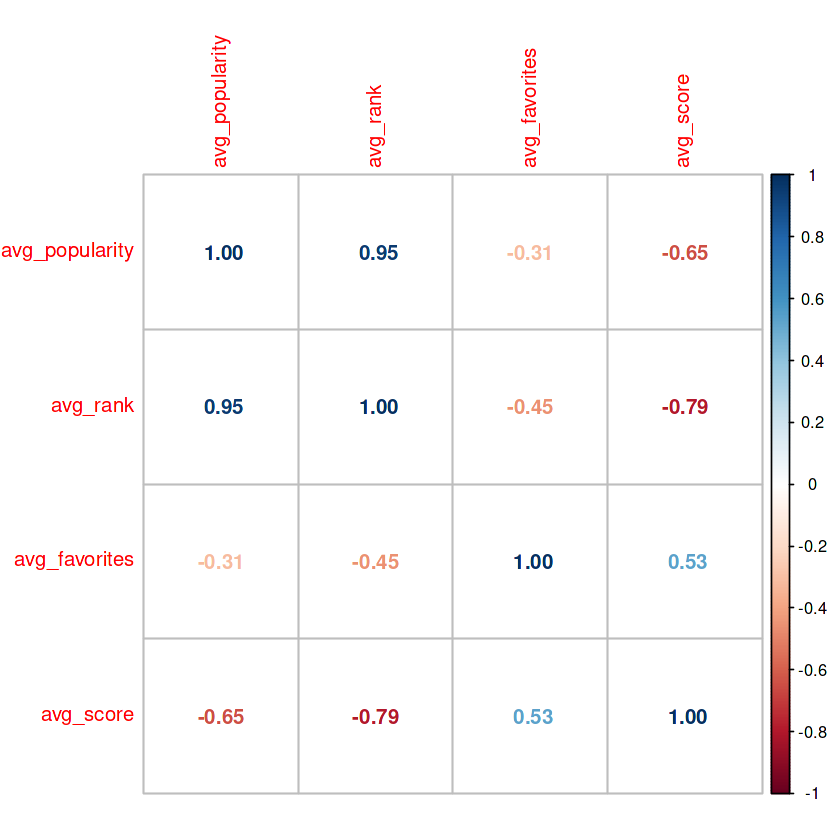

In [ ]:
# To get the correlation between the popularity metrics based on genre
corrgenre <- cor(genre_data_nonull[, c("avg_popularity", "avg_rank",
                                      "avg_favorites", "avg_score")])

corrplot(corrgenre, method = "number")

Regarding anime genre, the *rank* shows a strong correlation with *popularity* and *score*, while *popularity* and *score* exhibit a moderate relationship. *Favorites* demonstrate only a moderate connection with *score* and a weak relationship with the other two. *Score* displays a moderate to strong correlation with the other popularity metrics.

This implies that top-ranked genres tend to be both popular and receive higher scores. Popular genres and those with the most favorites also tend to achieve higher scores. However, the most favorited genre doesn't necessarily guarantee popularity or a higher rank. Overall, the score of a genre influences its favoritism and ranking within the anime community.

#### Studios Analysis

Calculating the average popularity and rank for studios may yield inaccurate results due to variations in the number of anime produced and their respective popularity and ranking. Some studios may have produced multiple anime with differing popularity and ranking, while others may have only one anime with higher popularity and ranking. Instead, a more accurate approach would be to identify the top 10 studios that have produced anime with the highest popularity and ranking.

In [ ]:
popular_nozero <- anime_data_2023[anime_data_2023$popularity != 0, ]
popular_ranked <- popular_nozero[order(popular_nozero$popularity, na.last = TRUE), ]

popular_anime <- popular_ranked %>% select("popularity", "anime_id", "name", "studios",)

head(popular_anime, n = 20)

,popularity,anime_id,name,studios
,<int>,<int>,<chr>,<chr>
7429,1,16498,Shingeki no Kyojin,Wit Studio
1394,2,1535,Death Note,Madhouse
3962,3,5114,Fullmetal Alchemist: Brotherhood,Bones
10409,4,30276,One Punch Man,Madhouse
6597,5,11757,Sword Art Online,A-1 Pictures
11135,6,31964,Boku no Hero Academia,Bones
14540,7,38000,Kimetsu no Yaiba,ufotable
11,8,20,Naruto,Pierrot
8620,9,22319,Tokyo Ghoul,Pierrot


The following is a list of the top 10 studios that have produced the most popular anime:
1. Wit Studio
2. Madhouse
3. Bones
4. A-1 Pictures
5. ufotable
6. Pierrot
7. CoMix Wave Films
8. White Fox
9. MAPPA
10. Kyoto Animation

In [ ]:
rank_nozero <- anime_data_2023[anime_data_2023$rank != 0, ]
rank_ranked <- rank_nozero[order(rank_nozero$rank, na.last = TRUE), ]

rank_anime <- rank_ranked %>% select("rank", "anime_id", "name", "studios",)

head(rank_anime, n = 20)

,rank,anime_id,name,studios
,<int>,<int>,<chr>,<chr>
3962,1,5114,Fullmetal Alchemist: Brotherhood,Bones
16618,2,41467,Bleach: Sennen Kessen-hen,Pierrot
5668,3,9253,Steins;Gate,White Fox
9881,4,28977,Gintama°,Bandai Namco Pictures
17573,5,43608,Kaguya-sama wa Kokurasetai: Ultra Romantic,A-1 Pictures
14866,6,38524,Shingeki no Kyojin Season 3 Part 2,Wit Studio
22349,7,51535,Shingeki no Kyojin: The Final Season - Kanketsu-hen,MAPPA
5990,8,9969,Gintama',Sunrise
15526,9,39486,Gintama: The Final,Bandai Namco Pictures


The following is a list of the top 10 studios that have produced the top ranked anime:
1. Bones
2. Pierrot
3. White Fox
4. Bandai Namco Pictures
5. A-1 Pictures
6. Wit Studio
7. MAPPA
8. Sunrise
9. Madhouse
10. K-Factory, Kitty Film Mitaka Studio

In [ ]:
# To separate studios
studios_split <- separate(anime_data_2023, studios,
                         c("studio_1", "studio_2", "studio_3", "studio_4", "studio_5",
                          "studio_6", "studio_7", "studio_8", "studio_9", "studio_10"),
                          sep = ", ", fill = "right")
head(studios_split)

,anime_id,name,english_name,other_name,score,genres,type,episodes,status,studio_1,⋯,source,duration,rating,rank,popularity,favorites,scored_by,members,image_url,users_rating
,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>
1,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi",TV,26,Finished Airing,Sunrise,⋯,Original,24 min per ep,R - 17+ (violence & profanity),41,43,78525,914193,1771505,https://cdn.myanimelist.net/images/anime/4/19644.jpg,8.772673
2,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi",Movie,1,Finished Airing,Bones,⋯,Original,1 hr 55 min,R - 17+ (violence & profanity),189,602,1448,206248,360978,https://cdn.myanimelist.net/images/anime/1439/93480.jpg,8.378287
3,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi",TV,26,Finished Airing,Madhouse,⋯,Manga,24 min per ep,PG-13 - Teens 13 or older,328,246,15035,356739,727252,https://cdn.myanimelist.net/images/anime/7/20310.jpg,8.296920
4,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",TV,26,Finished Airing,Sunrise,⋯,Original,25 min per ep,PG-13 - Teens 13 or older,2764,1795,613,42829,111931,https://cdn.myanimelist.net/images/anime/10/19969.jpg,7.377905
5,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",TV,52,Finished Airing,Toei Animation,⋯,Manga,23 min per ep,PG - Children,4240,5126,14,6413,15001,https://cdn.myanimelist.net/images/anime/7/21569.jpg,7.015062
6,15,Eyeshield 21,NA,アイシールド21,7.92,Sports,TV,145,Finished Airing,Gallop,⋯,Manga,23 min per ep,PG-13 - Teens 13 or older,688,1252,1997,86524,177688,https://cdn.myanimelist.net/images/anime/1079/133529.jpg,7.980910


In [ ]:
# To get the most favorited studios
# studio_1
studios1_favorites <- studios_split %>% group_by(studio_1) %>%
    summarise(studio1_favorites = mean(favorites, na.rm = TRUE))

studios1_favorites <- rename(studios1_favorites, studio = studio_1)

# studio_2
studios2_favorites <- studios_split %>% group_by(studio_2) %>%
    summarise(studio2_favorites = mean(favorites, na.rm = TRUE))

studios2_favorites <- rename(studios2_favorites, studio = studio_2)

# studio_3
studios3_favorites <- studios_split %>% group_by(studio_3) %>%
    summarise(studio3_favorites = mean(favorites, na.rm = TRUE))

studios3_favorites <- rename(studios3_favorites, studio = studio_3)

#studio_4
studios4_favorites <- studios_split %>% group_by(studio_4) %>%
    summarise(studio4_favorites = mean(favorites, na.rm = TRUE))

studios4_favorites <- rename(studios4_favorites, studio = studio_4)

# studio_5
studios5_favorites <- studios_split %>% group_by(studio_5) %>%
    summarise(studio5_favorites = mean(favorites, na.rm = TRUE))

studios5_favorites <- rename(studios5_favorites, studio = studio_5)

# studio_6
studios6_favorites <- studios_split %>% group_by(studio_6) %>%
    summarise(studio6_favorites = mean(favorites, na.rm = TRUE))

studios6_favorites <- rename(studios6_favorites, studio = studio_6)

# studio_7
studios7_favorites <- studios_split %>% group_by(studio_7) %>%
    summarise(studio7_favorites = mean(favorites, na.rm = TRUE))

studios7_favorites <- rename(studios7_favorites, studio = studio_7)

# studio_8
studios8_favorites <- studios_split %>% group_by(studio_8) %>%
    summarise(studio8_favorites = mean(favorites, na.rm = TRUE))

studios8_favorites <- rename(studios8_favorites, studio = studio_8)

# studio_9
studios9_favorites <- studios_split %>% group_by(studio_9) %>%
    summarise(studio9_favorites = mean(favorites, na.rm = TRUE))

studios9_favorites <- rename(studios9_favorites, studio = studio_9)

# studio_10
studios10_favorites <- studios_split %>% group_by(studio_10) %>%
    summarise(studio10_favorites = mean(favorites, na.rm = TRUE))

studios10_favorites <- rename(studios10_favorites, studio = studio_10)

# To combine studios data frames
studios12_favorites <- left_join(studios1_favorites, studios2_favorites, by = "studio")
studios123_favorites <- left_join(studios12_favorites, studios3_favorites, by = "studio")
studios1234_favorites <- left_join(studios123_favorites, studios4_favorites, by = "studio")
studios12345_favorites <- left_join(studios1234_favorites, studios5_favorites, by = "studio")
studios123456_favorites <- left_join(studios12345_favorites, studios6_favorites, by = "studio")
studios1234567_favorites <- left_join(studios123456_favorites, studios7_favorites, by = "studio")
studios12345678_favorites <- left_join(studios1234567_favorites, studios8_favorites, by = "studio")
studios123456789_favorites <- left_join(studios12345678_favorites, studios9_favorites, by = "studio")
studios_favorites <- left_join(studios123456789_favorites, studios10_favorites, by = "studio")

head(studios_favorites)

studio,studio1_favorites,studio2_favorites,studio3_favorites,studio4_favorites,studio5_favorites,studio6_favorites,studio7_favorites,studio8_favorites,studio9_favorites,studio10_favorites
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10Gauge,8.000000,8,NA,NA,NA,NA,NA,NA,NA,NA
1IN,0.000000,NA,NA,NA,NA,NA,NA,NA,NA,NA
2:10 AM Animation,9.222222,NA,NA,NA,NA,NA,NA,NA,NA,NA
33 Collective,0.000000,NA,NA,NA,NA,NA,NA,NA,NA,NA
5 Inc.,5.000000,14,NA,NA,NA,NA,NA,NA,NA,NA
6pucks,0.000000,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [ ]:
# To get the most favorited for all studios
studio_favorites_columns <- c("studio1_favorites", "studio2_favorites", "studio3_favorites",
                               "studio4_favorites", "studio5_favorites", "studio6_favorites",
                               "studio7_favorites", "studio8_favorites", "studio9_favorites",
                               "studio10_favorites")

# Calculate the average favorites across studios for each row
studios_favorites$avg_favorites <- rowMeans(studios_favorites[, studio_favorites_columns],
                                                     na.rm = TRUE)

head(studios_favorites)

studio,studio1_favorites,studio2_favorites,studio3_favorites,studio4_favorites,studio5_favorites,studio6_favorites,studio7_favorites,studio8_favorites,studio9_favorites,studio10_favorites,avg_favorites
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10Gauge,8.000000,8,NA,NA,NA,NA,NA,NA,NA,NA,8.000000
1IN,0.000000,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.000000
2:10 AM Animation,9.222222,NA,NA,NA,NA,NA,NA,NA,NA,NA,9.222222
33 Collective,0.000000,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.000000
5 Inc.,5.000000,14,NA,NA,NA,NA,NA,NA,NA,NA,9.500000
6pucks,0.000000,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.000000


In [ ]:
# To get the most favorited studios
studio_favorites <- studios_favorites %>% select("studio", "avg_favorites")
head(studio_favorites[order(-studio_favorites$avg_favorites), ], n = 10)

studio,avg_favorites
<chr>,<dbl>
Trigger,8509.875
CloverWorks,7011.038
Tatsunoko Production,6487.270
Graphinica,5426.373
White Fox,5300.994
K-Factory,5244.000
MAPPA,5067.773
Nexus,5043.778
Studio Bind,5025.400


In [ ]:
# To get the top scored studios
# studio_1
studios1_score <- studios_split %>% group_by(studio_1) %>%
    summarise(studio1_score = mean(score, na.rm = TRUE))

studios1_score <- rename(studios1_score, studio = studio_1)

# studio_2
studios2_score <- studios_split %>% group_by(studio_2) %>%
    summarise(studio2_score = mean(score, na.rm = TRUE))

studios2_score <- rename(studios2_score, studio = studio_2)

# studio_3
studios3_score <- studios_split %>% group_by(studio_3) %>%
    summarise(studio3_score = mean(score, na.rm = TRUE))

studios3_score <- rename(studios3_score, studio = studio_3)

#studio_4
studios4_score <- studios_split %>% group_by(studio_4) %>%
    summarise(studio4_score = mean(score, na.rm = TRUE))

studios4_score <- rename(studios4_score, studio = studio_4)

# studio_5
studios5_score <- studios_split %>% group_by(studio_5) %>%
    summarise(studio5_score = mean(score, na.rm = TRUE))

studios5_score <- rename(studios5_score, studio = studio_5)

# studio_6
studios6_score <- studios_split %>% group_by(studio_6) %>%
    summarise(studio6_score = mean(score, na.rm = TRUE))

studios6_score <- rename(studios6_score, studio = studio_6)

# studio_7
studios7_score <- studios_split %>% group_by(studio_7) %>%
    summarise(studio7_score = mean(score, na.rm = TRUE))

studios7_score <- rename(studios7_score, studio = studio_7)

# studio_8
studios8_score <- studios_split %>% group_by(studio_8) %>%
    summarise(studio8_score = mean(score, na.rm = TRUE))

studios8_score <- rename(studios8_score, studio = studio_8)

# studio_9
studios9_score <- studios_split %>% group_by(studio_9) %>%
    summarise(studio9_score = mean(score, na.rm = TRUE))

studios9_score <- rename(studios9_score, studio = studio_9)

# studio_10
studios10_score <- studios_split %>% group_by(studio_10) %>%
    summarise(studio10_score = mean(score, na.rm = TRUE))

studios10_score <- rename(studios10_score, studio = studio_10)

# To combine studios data frames
studios12_score <- left_join(studios1_score, studios2_score, by = "studio")
studios123_score <- left_join(studios12_score, studios3_score, by = "studio")
studios1234_score <- left_join(studios123_score, studios4_score, by = "studio")
studios12345_score <- left_join(studios1234_score, studios5_score, by = "studio")
studios123456_score <- left_join(studios12345_score, studios6_score, by = "studio")
studios1234567_score <- left_join(studios123456_score, studios7_score, by = "studio")
studios12345678_score <- left_join(studios1234567_score, studios8_score, by = "studio")
studios123456789_score <- left_join(studios12345678_score, studios9_score, by = "studio")
studios_score <- left_join(studios123456789_score, studios10_score, by = "studio")

head(studios_score)

studio,studio1_score,studio2_score,studio3_score,studio4_score,studio5_score,studio6_score,studio7_score,studio8_score,studio9_score,studio10_score
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10Gauge,6.798000,6.40,NA,NA,NA,NA,NA,NA,NA,NA
1IN,NaN,NA,NA,NA,NA,NA,NA,NA,NA,NA
2:10 AM Animation,6.432857,NA,NA,NA,NA,NA,NA,NA,NA,NA
33 Collective,NaN,NA,NA,NA,NA,NA,NA,NA,NA,NA
5 Inc.,5.820000,6.42,NA,NA,NA,NA,NA,NA,NA,NA
6pucks,NaN,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [ ]:
# To get the top scored for all studios
studio_score_columns <- c("studio1_score", "studio2_score", "studio3_score",
                               "studio4_score", "studio5_score", "studio6_score",
                               "studio7_score", "studio8_score", "studio9_score",
                               "studio10_score")

# Calculate the average scores across studios for each row
studios_score$avg_score <- rowMeans(studios_score[, studio_score_columns],
                                                     na.rm = TRUE)

head(studios_score)

studio,studio1_score,studio2_score,studio3_score,studio4_score,studio5_score,studio6_score,studio7_score,studio8_score,studio9_score,studio10_score,avg_score
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10Gauge,6.798000,6.40,NA,NA,NA,NA,NA,NA,NA,NA,6.599000
1IN,NaN,NA,NA,NA,NA,NA,NA,NA,NA,NA,NaN
2:10 AM Animation,6.432857,NA,NA,NA,NA,NA,NA,NA,NA,NA,6.432857
33 Collective,NaN,NA,NA,NA,NA,NA,NA,NA,NA,NA,NaN
5 Inc.,5.820000,6.42,NA,NA,NA,NA,NA,NA,NA,NA,6.120000
6pucks,NaN,NA,NA,NA,NA,NA,NA,NA,NA,NA,NaN


In [ ]:
# To get the top scored studios
studio_score <- studios_score %>% select("studio", "avg_score")
head(studio_score[order(-studio_score$avg_score), ], n = 10)

studio,avg_score
<chr>,<dbl>
K-Factory,8.396667
Nippon Ramayana Film Co.,8.290000
Sharefun Studio,8.095000
Studio Signpost,7.902500
Studio Kafka,7.805000
Shenman Entertainment,7.785000
Frontier One,7.770000
Djinn Power,7.760000
Motion Magic,7.629091


In [ ]:
# To combine the studio data frames
studio_data <- left_join(studio_favorites, studio_score, by = "studio")

# To eliminate null values
studio_data_nonull <- na.omit(studio_data)
head(studio_data_nonull)

studio,avg_favorites,avg_score
<chr>,<dbl>,<dbl>
10Gauge,8.000000,6.599000
2:10 AM Animation,9.222222,6.432857
5 Inc.,9.500000,6.120000
7doc,2.428571,6.180000
8bit,886.787037,7.358922
A-1 Pictures,4140.297076,7.341790


In [ ]:
# To get the correlation between the favorites and score based on studio
corrstudio <- cor(studio_data_nonull[, c("avg_favorites", "avg_score")])
print(corrstudio)

              avg_favorites avg_score
avg_favorites     1.0000000 0.3061954
avg_score         0.3061954 1.0000000


Regarding anime studios, there appears to be a weak relationship between users favoriting an anime and the score they assign to it.

The anime studios with the highest values across all popularity metrics include Bones, White Fox, MAPPA, and K-Factory. Following closely are Wit Studio, Madhouse, A-1 Pictures, and Pierrot.

#### Source Analysis

In [ ]:
# To get the average popularity, rank, favorites, and score of source
source_popularity <- anime_data_2023 %>% group_by(source) %>%
    summarise(avg_popularity = mean(popularity, na.rm = TRUE))

source_rank <- anime_data_2023 %>% group_by(source) %>%
    summarise(avg_rank = mean(rank, na.rm = TRUE))

source_favorites <- anime_data_2023 %>% group_by(source) %>%
    summarise(avg_favorites = mean(favorites, na.rm = TRUE))

source_score <- anime_data_2023 %>% group_by(source) %>%
    summarise(avg_score = mean(score, na.rm = TRUE))

# To get sort the sources based on popularity metrics
source_popularity[order(source_popularity$avg_popularity, na.last = TRUE), ]
source_rank[order(source_rank$avg_rank, na.last = TRUE), ]
source_favorites[order(-source_favorites$avg_favorites, na.last = TRUE), ]
source_score[order(-source_score$avg_score, na.last = TRUE), ]

source,avg_popularity
<chr>,<dbl>
Light novel,3603.365
Manga,6711.845
Visual novel,6924.093
4-koma manga,7056.465
Web manga,8016.255
Card game,8342.059
Game,10196.983
Novel,10225.525
Mixed media,10230.327


source,avg_rank
<chr>,<dbl>
Light novel,4435.131
Manga,5725.118
Visual novel,6296.812
4-koma manga,6791.424
Music,6921.590
Web novel,7123.704
Card game,7606.985
Web manga,7652.796
Novel,7718.615


source,avg_favorites
<chr>,<dbl>
Light novel,1737.953512
Manga,1226.404950
Web manga,901.791946
4-koma manga,458.098726
Visual novel,448.170732
Novel,436.258110
Web novel,192.256098
Original,183.162752
Mixed media,103.604938


source,avg_score
<chr>,<dbl>
Web novel,6.996429
Light novel,6.959065
Manga,6.830063
Web manga,6.749270
Novel,6.715667
4-koma manga,6.656107
Book,6.452418
Mixed media,6.440804
Card game,6.318154



The anime source materials with the highest values across all popularity metrics are light novels, manga, and web manga. Following closely are visual novels and 4-koma manga. Web novels claim the highest score among source materials, with novels also ranking among the top in this regard. Additionally, music is among the top 5 source materials in terms of ranking.

In [ ]:
# To join the popularity metrics of source
source_popularity_rank <- left_join(source_popularity, source_rank, by = "source")
source_popularity_rank_favorites <- left_join(source_popularity_rank, source_favorites, by = "source")
source_data <- left_join(source_popularity_rank_favorites, source_score, by = "source")

# To eliminate null values
source_data_nonull <- na.omit(source_data)

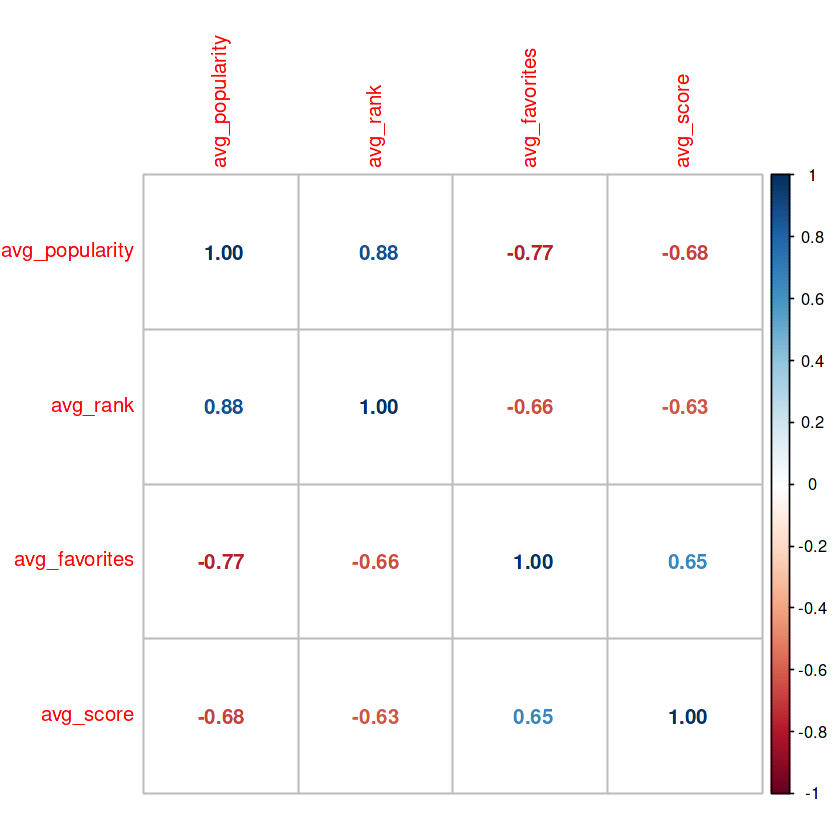

In [ ]:
# To get the correlation between the popularity metrics based on source
corrsource <- cor(source_data_nonull[, c("avg_popularity", "avg_rank",
                                         "avg_favorites", "avg_score")])

corrplot(corrsource, method = "number")


Across anime source materials, there exists a moderate to strong relationship among all popularity metrics. This suggests that the popularity of an anime source material tends to align closely with its overall ranking, how many users have favorited it, and the score it receives. In other words, when a source material is highly popular, it is likely to have a higher ranking, more favorites from users, and a better score.


### Conclusion

In conclusion, our analysis of anime ranking and user engagement metrics provides valuable insights into the factors influencing viewer preferences and anime success on the platform (myanimelist).

We observed a complex relationship between the anime's overall ranking, popularity, and score, with the anime rank demonstrating a stronger correlation with its score compared to its popularity. This indicates that factors beyond popularity influence user ratings, highlighting the multifaceted nature of anime evaluation.

Analysis of anime genres reveals a strong relationship between the anime rank and popularity, with popular genres tending to achieve higher scores. However, genres with more favorites do not necessarily guarantee higher popularity or ranking, highlighting the nuanced relationship between user engagement and anime ranking metrics.

Furthermore, our analysis of anime studios revealed interesting findings. While there appears to be a weak relationship between users favoriting an anime and the score they assign to it, certain studios consistently produce anime with high values across all popularity metrics. Bones, White Fox, MAPPA, and K-Factory emerge as top-performing studios, suggesting their knack for delivering content that resonates with viewers.

Similarly, our exploration of anime source materials unveiled insightful patterns. Light novels, manga, and web manga rank highest across all popularity metrics, with web novels claiming the highest score among source materials. This indicates a strong alignment between the popularity of source material and its overall ranking, user favoritism, and score.

In conclusion, our analysis underscores the importance of considering various factors, including rank, score, user engagement metrics, studio affiliations, and source materials, when evaluating anime popularity and user engagement. Armed with these insights, streaming platfoms can refine their content curation strategies, prioritize licensing agreements, and enhance user experiences to cater to viewer preferences effectively.